In [1]:
%matplotlib notebook
import imageio
import numpy as np
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
import gudhi
import matplotlib as mpl
import pickle
import sys
import time

sys.path.insert(0, '/Users/adeliegarin/Google Drive/PhD/Sinergia/Code/Topological-Image-Processing/Persistence Homology')

import filtrations as filt
import preprocessing as pre
import barcodes as bar
import plots as plot
import distances as dist
import pipeline as pipe

In [2]:
v1 = np.array([1,0])
v2 = np.array([0,1])
v3 = np.array([0,-1])
v4 = np.array([-1,0])

# Dangling roads: 
### You can see now that the score depends on the direction of v. The second score is always 0 as there are no bridges. The first score changes accordingly to the direction of the dangling road (if it corresponds to the direction of v, it will be non zero.)

In [3]:
label = imageio.imread('manual_mods/gt.png')[:,:,0]>128
pred_masks = [imageio.imread('manual_mods/one_dangling0.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/one_dangling1.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/one_dangling2.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/many_dangling0.jpg')[:,:,0]>128]
names = ["One dangling 0", "One dangling 1", "One dangling 2" ,"Many danglings"]

label_s = skeletonize(label*1)*1

plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v1")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v1 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))
    

    

OSError: No such file: '/home/citraro/projects/topoloss4neurons/adelie_code/barcode_new_wasserstein/manual_mods/gt.png'

<IPython.core.display.Javascript object>


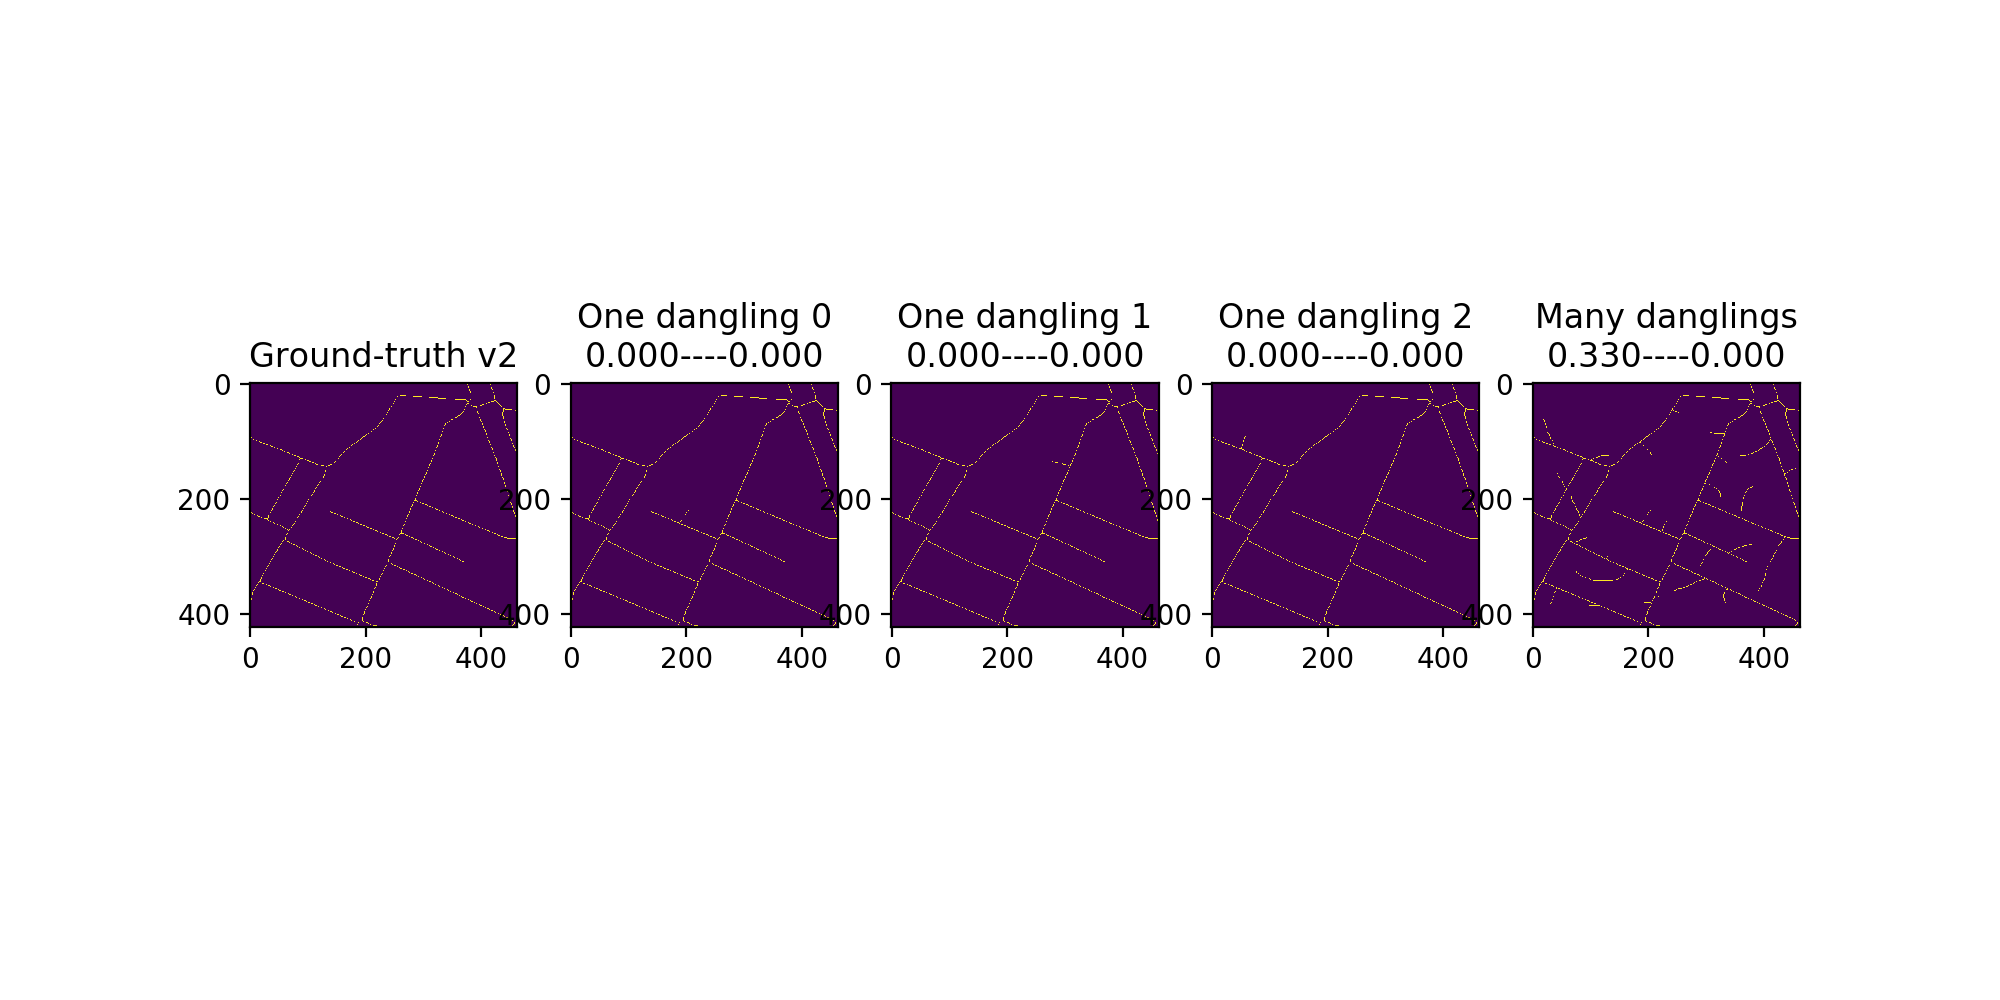

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v2")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v2 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))

<IPython.core.display.Javascript object>


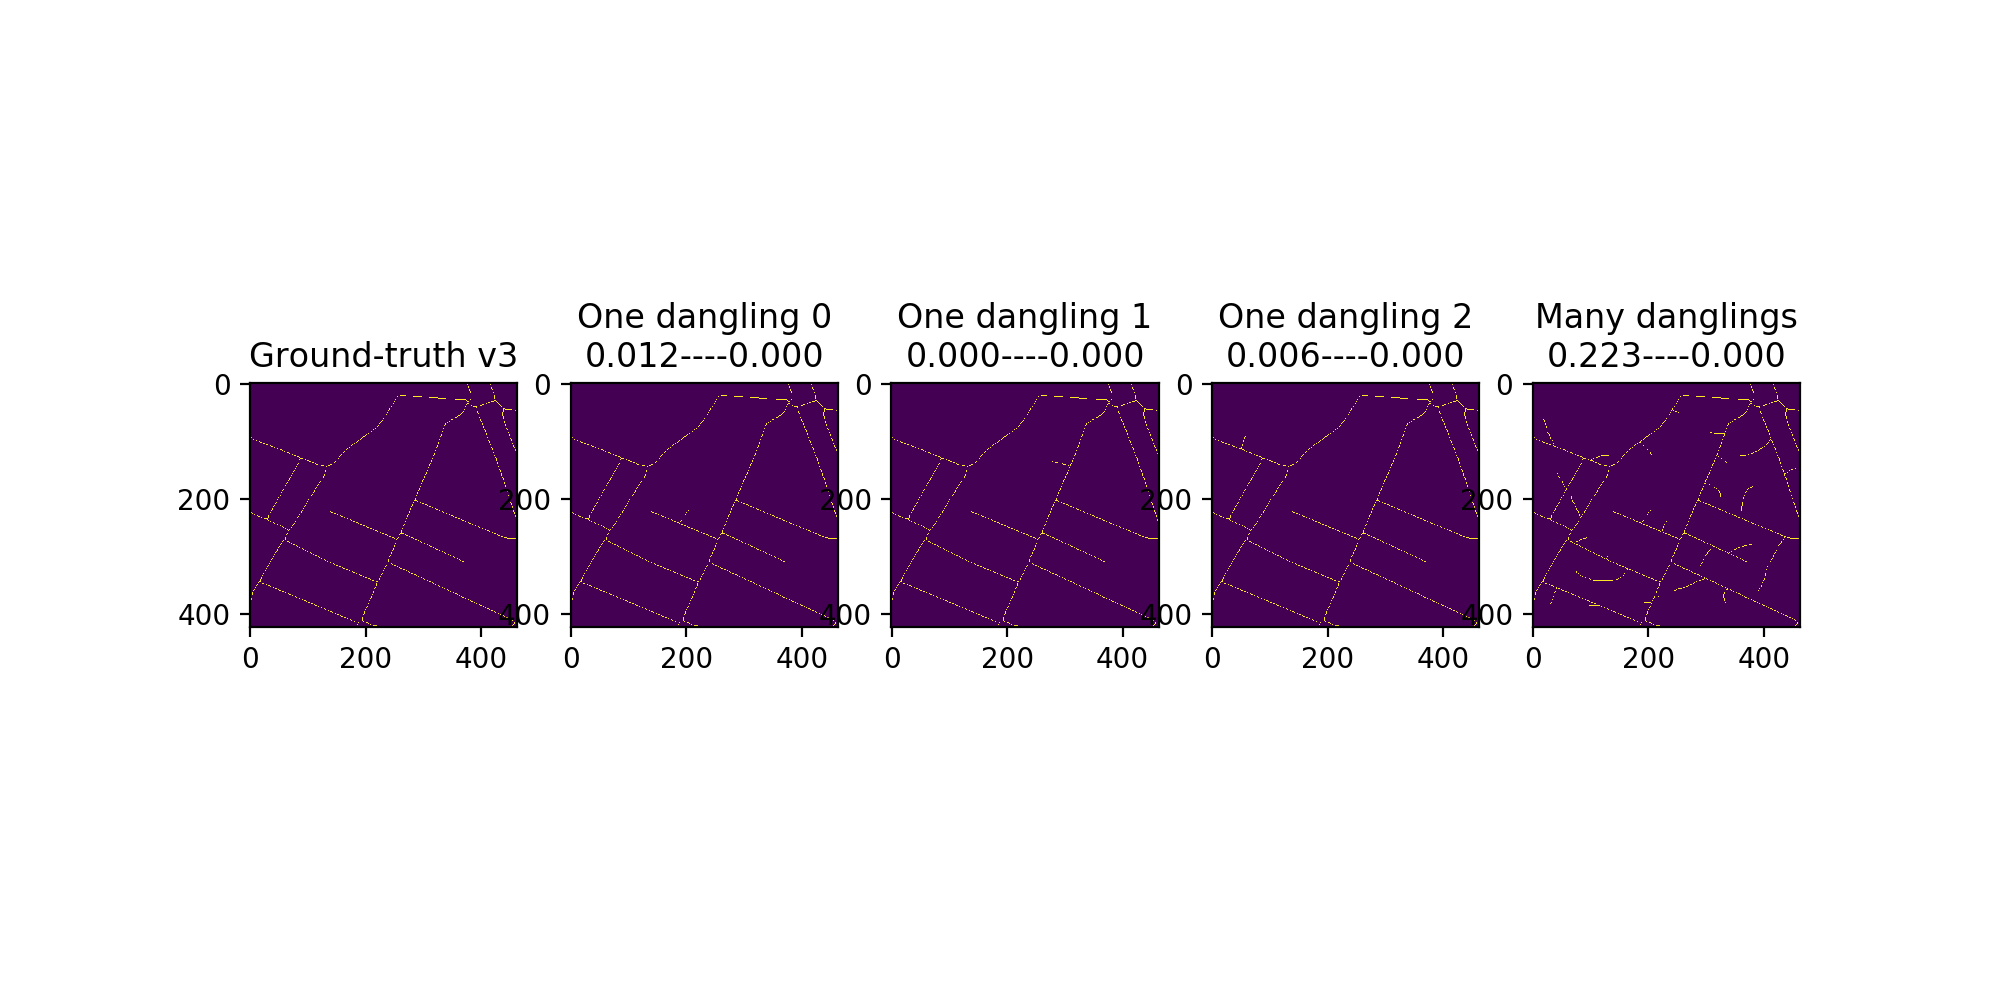

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v3")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v3 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))

<IPython.core.display.Javascript object>


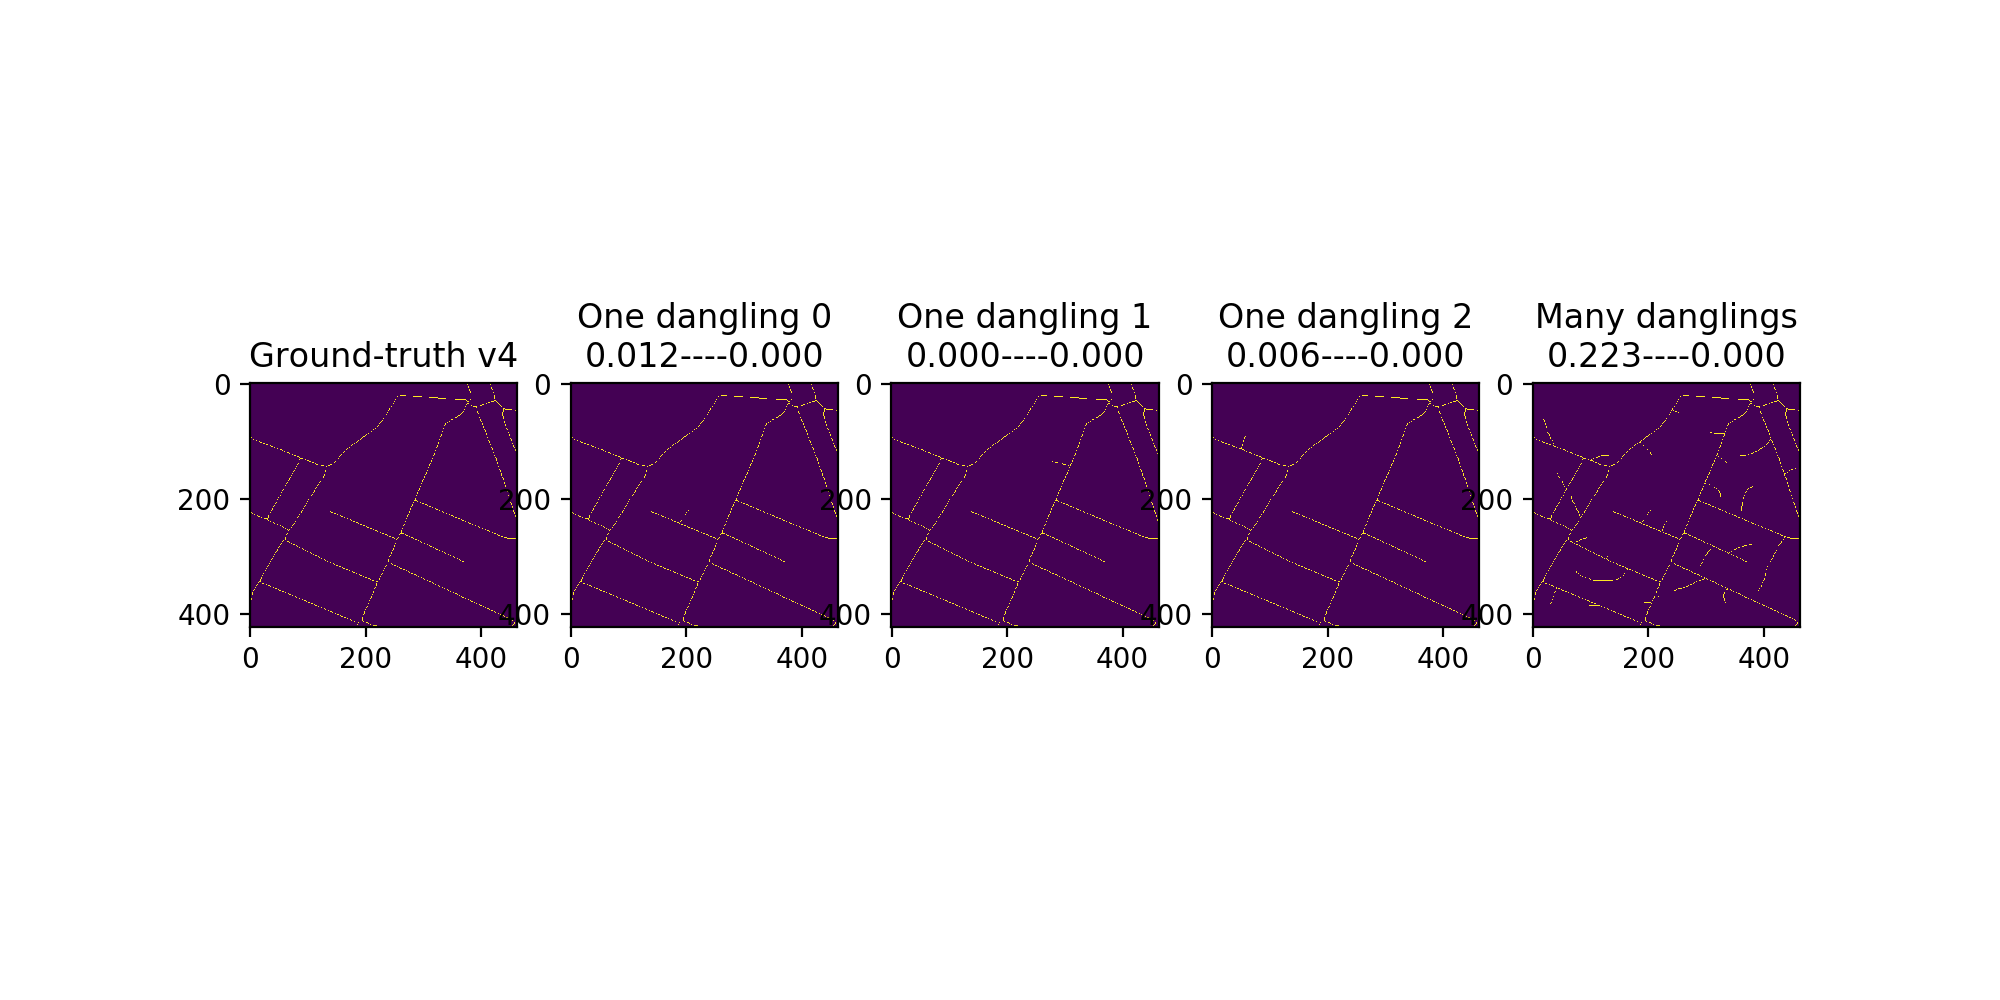

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v4")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v4 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))

# Bridging roads:

### Again the score depends on v, sometimes it detects bridges more or less. The only one that seemed weird to me at the beginning is the v1 one, but then I found why the first score is changing as well that much : the long road where you're adding the bridge is detected as a new connected component when you come from the left (v1 = (1,0 ) ) and it merges with the rest depening on the size of the bridge. 

## Anyway, the score clearly increases with the number of bridges in all cases.

<IPython.core.display.Javascript object>


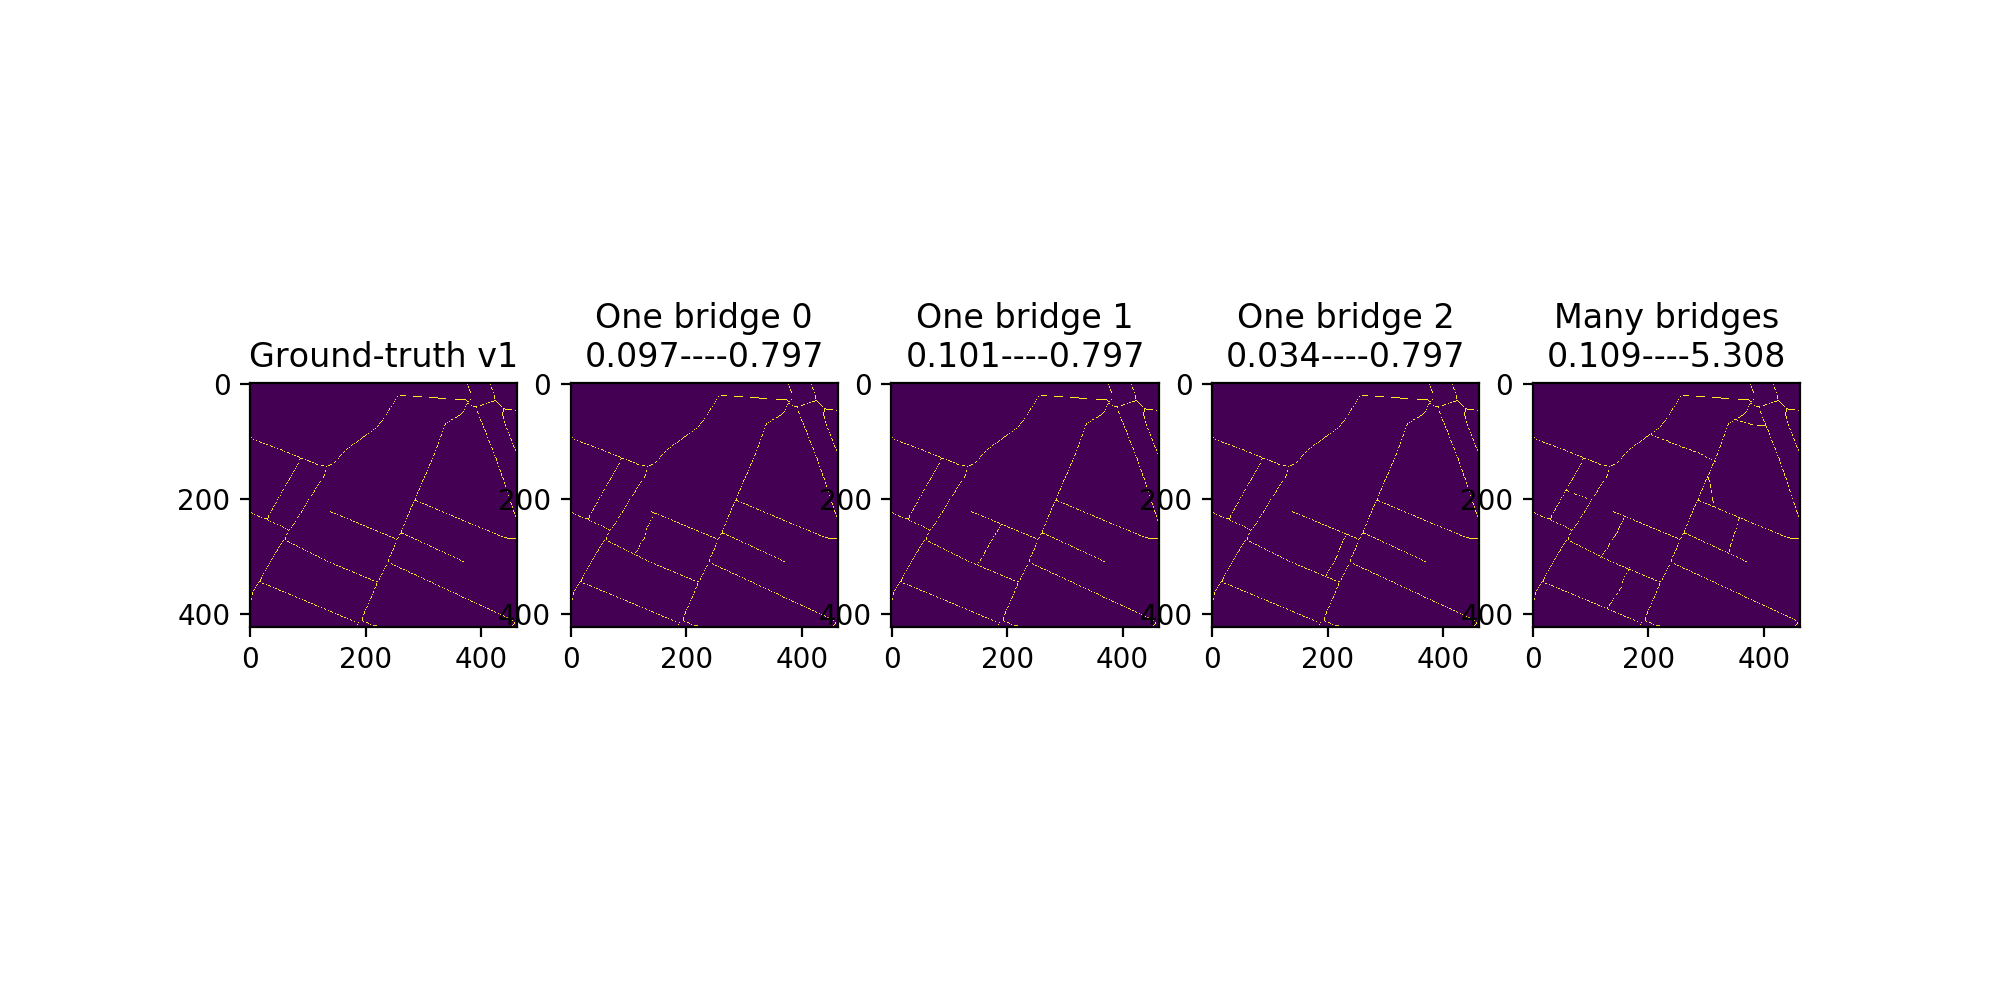

In [21]:
label = imageio.imread('manual_mods/gt.png')[:,:,0]>128
pred_masks = [imageio.imread('manual_mods/one_bridge0.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/one_bridge1.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/one_bridge2.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/many_bridge0.jpg')[:,:,0]>128]
names = ["One bridge 0", "One bridge 1", "One bridge 2" ,"Many bridges"]

label_s = skeletonize(label*1)*1

plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v1")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v1 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))
    


<IPython.core.display.Javascript object>


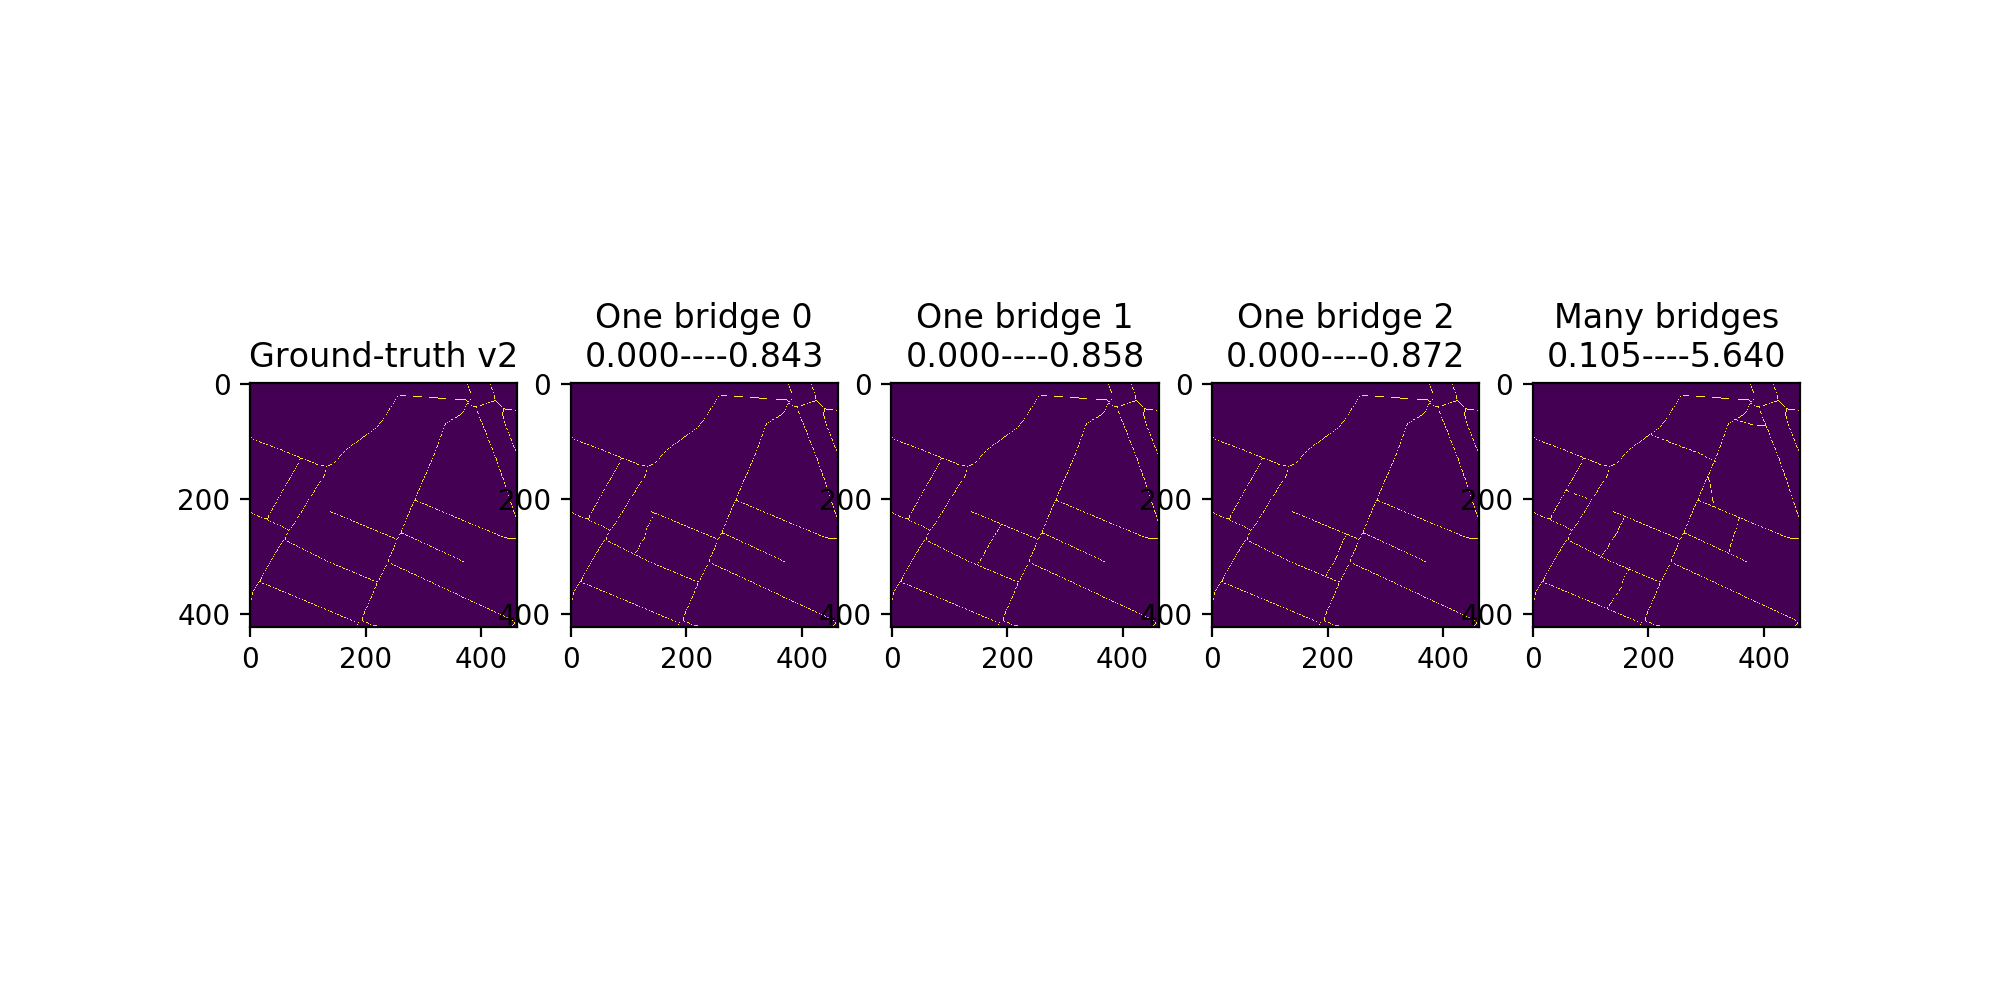

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v2")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v2 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))
    


<IPython.core.display.Javascript object>


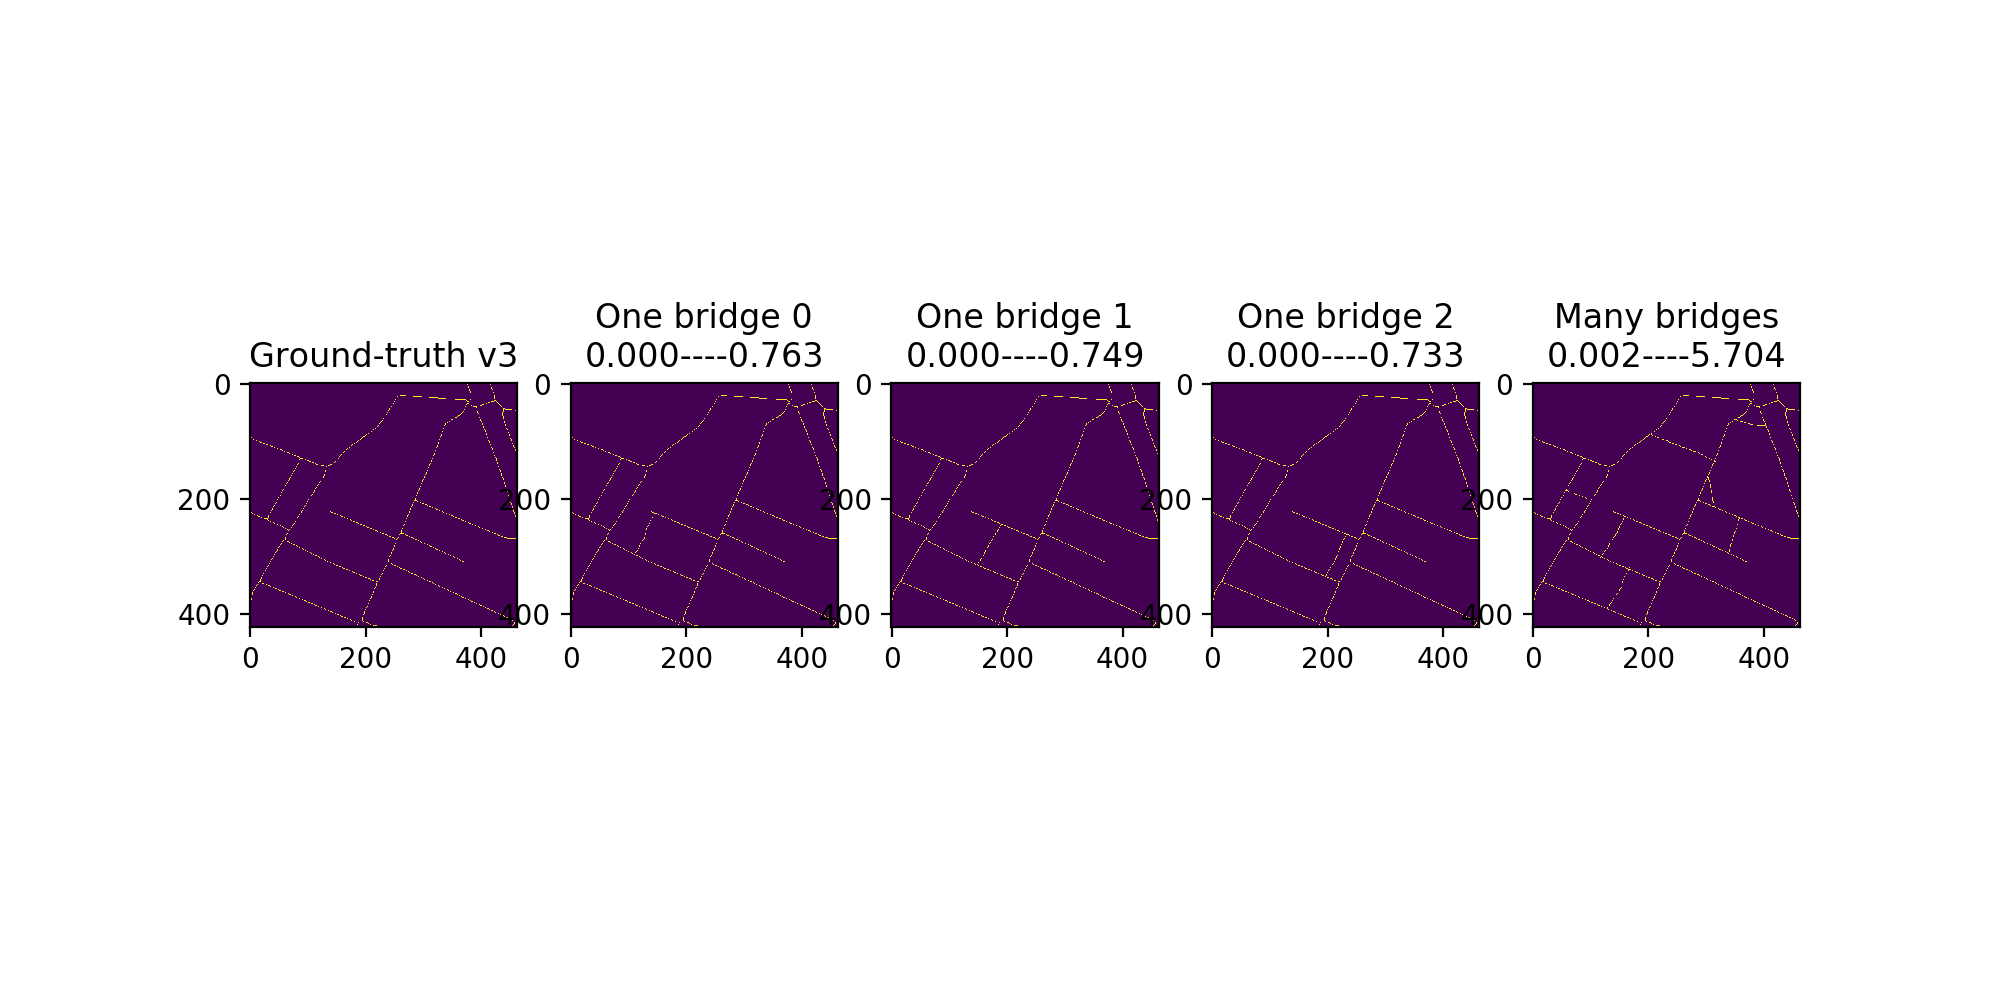

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v3")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v3 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))
    


<IPython.core.display.Javascript object>


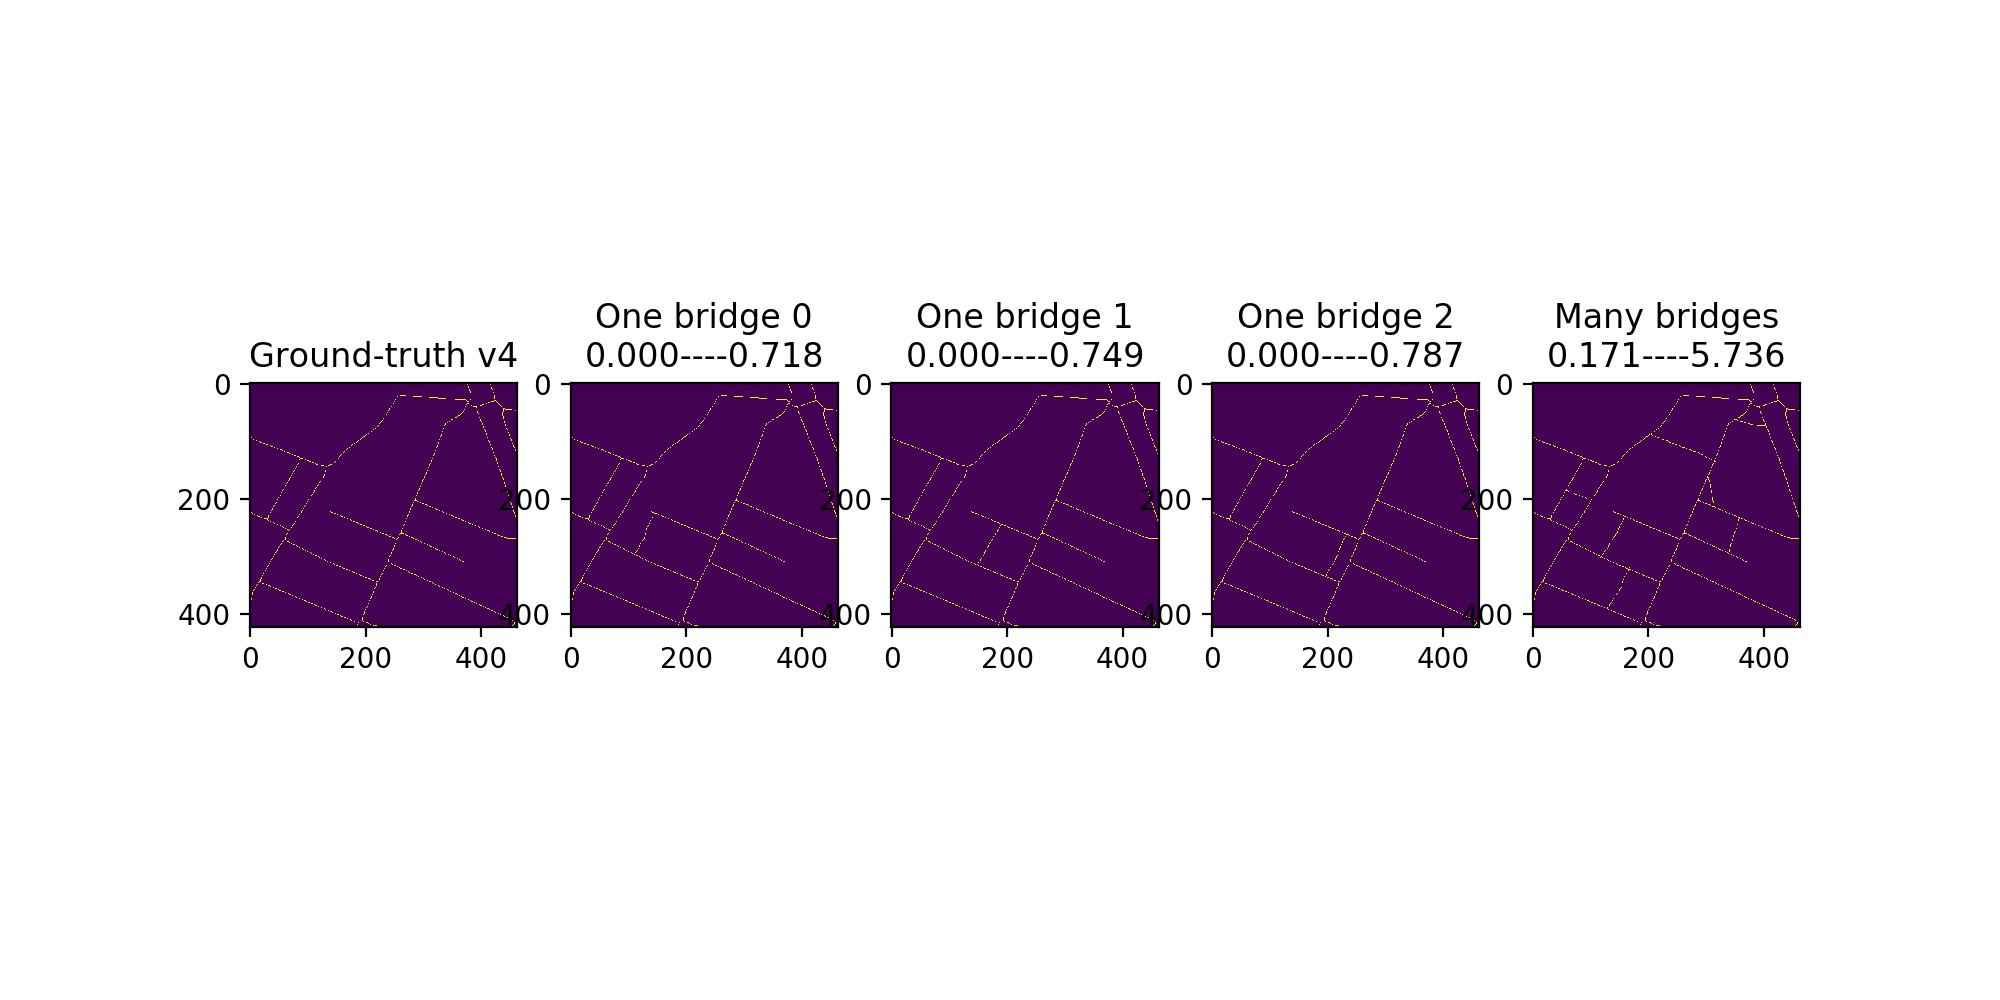

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v4")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v4 )

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.3f}----{:0.3f}".format(score[0],score[1]))
    


# Interrupted roads:

## Same as bridges, it depends on the direction of the interruption and of v. As the 2 first interruptions are exactly parallel, we get the same score for each v and then the 3rd one get a different score. But, the score of each v is different, and with combining the results we could most likely detect exactly where the disconnections are (I'm working on that). Many interruptions increases the score.

<IPython.core.display.Javascript object>


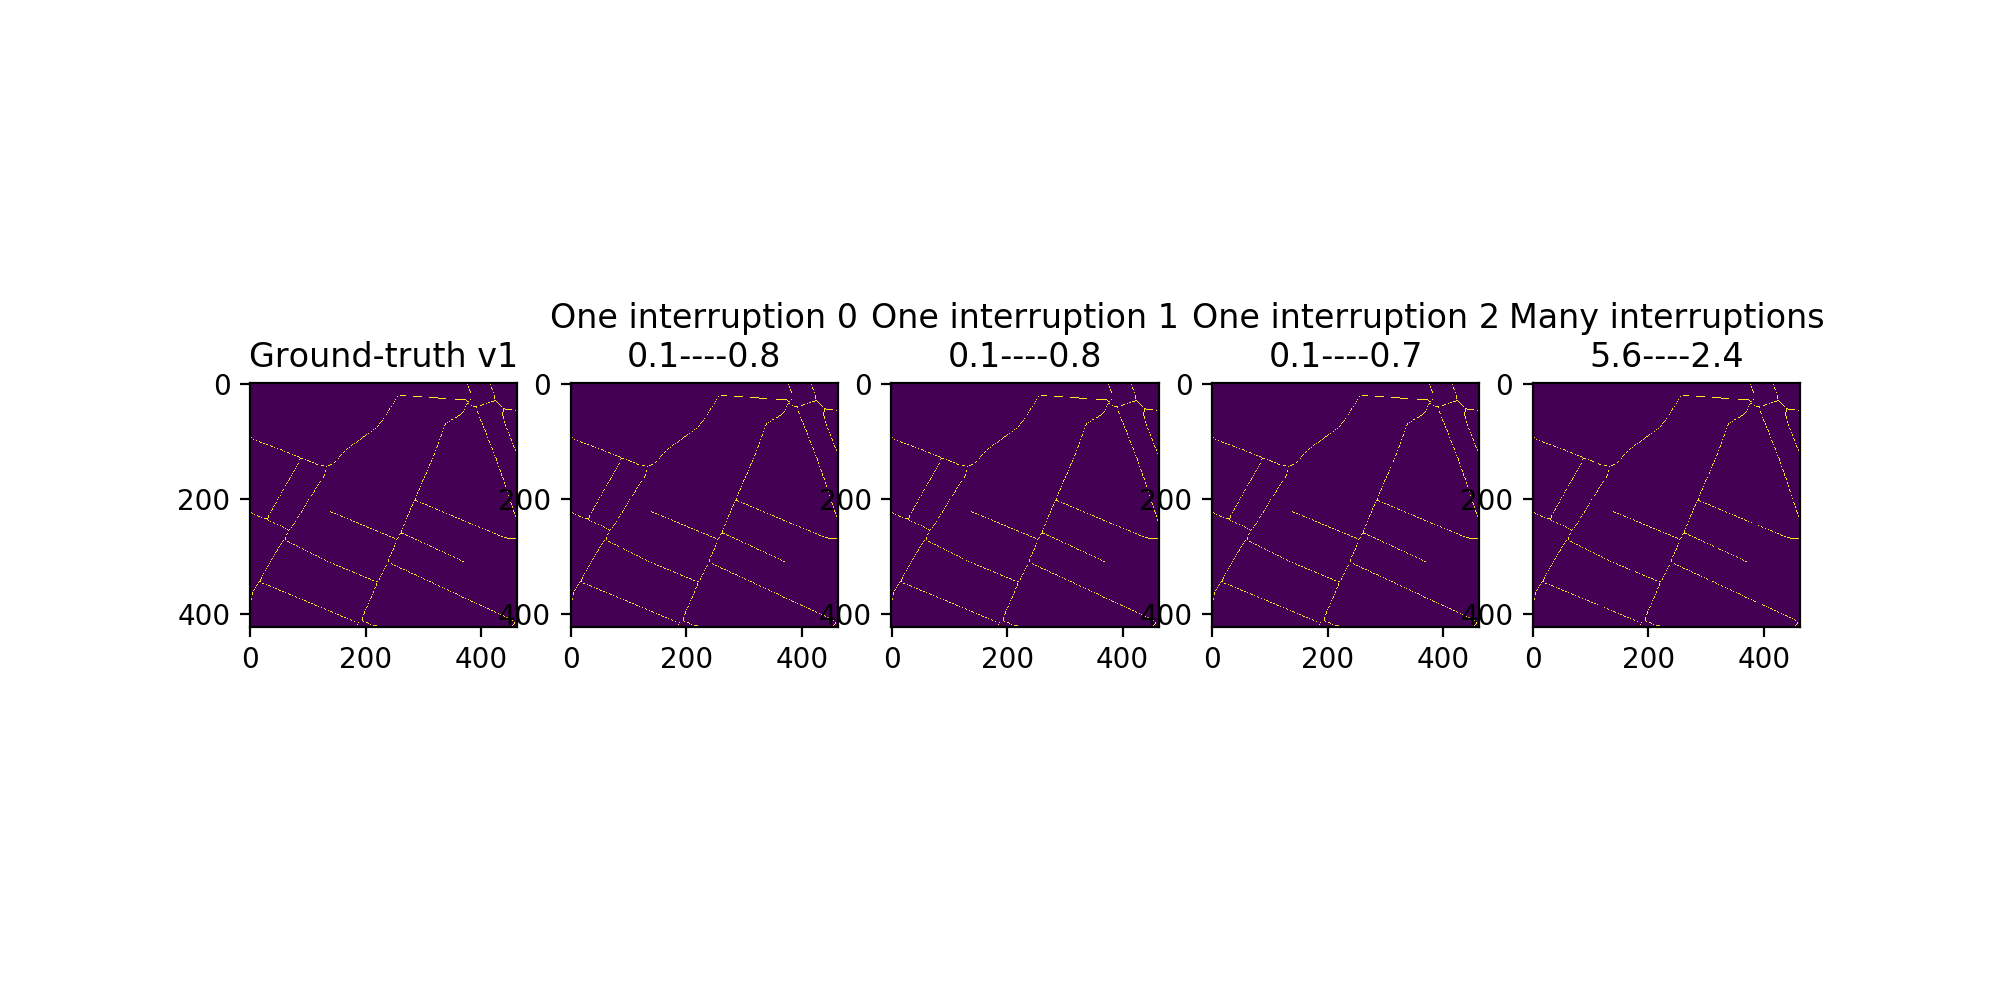

In [26]:
label = imageio.imread('manual_mods/gt.png')[:,:,0]>128
pred_masks = [imageio.imread('manual_mods/one_interruption0.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/one_interruption1.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/one_interruption3.jpg')[:,:,0]>128,
              imageio.imread('manual_mods/many_interruption0.jpg')[:,:,0]>128]
names = ["One interruption 0", "One interruption 1", "One interruption 2" ,"Many interruptions"]

label_s = skeletonize(label*1)*1

plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v1")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v1)

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.1f}----{:0.1f}".format(score[0],score[1]))

<IPython.core.display.Javascript object>


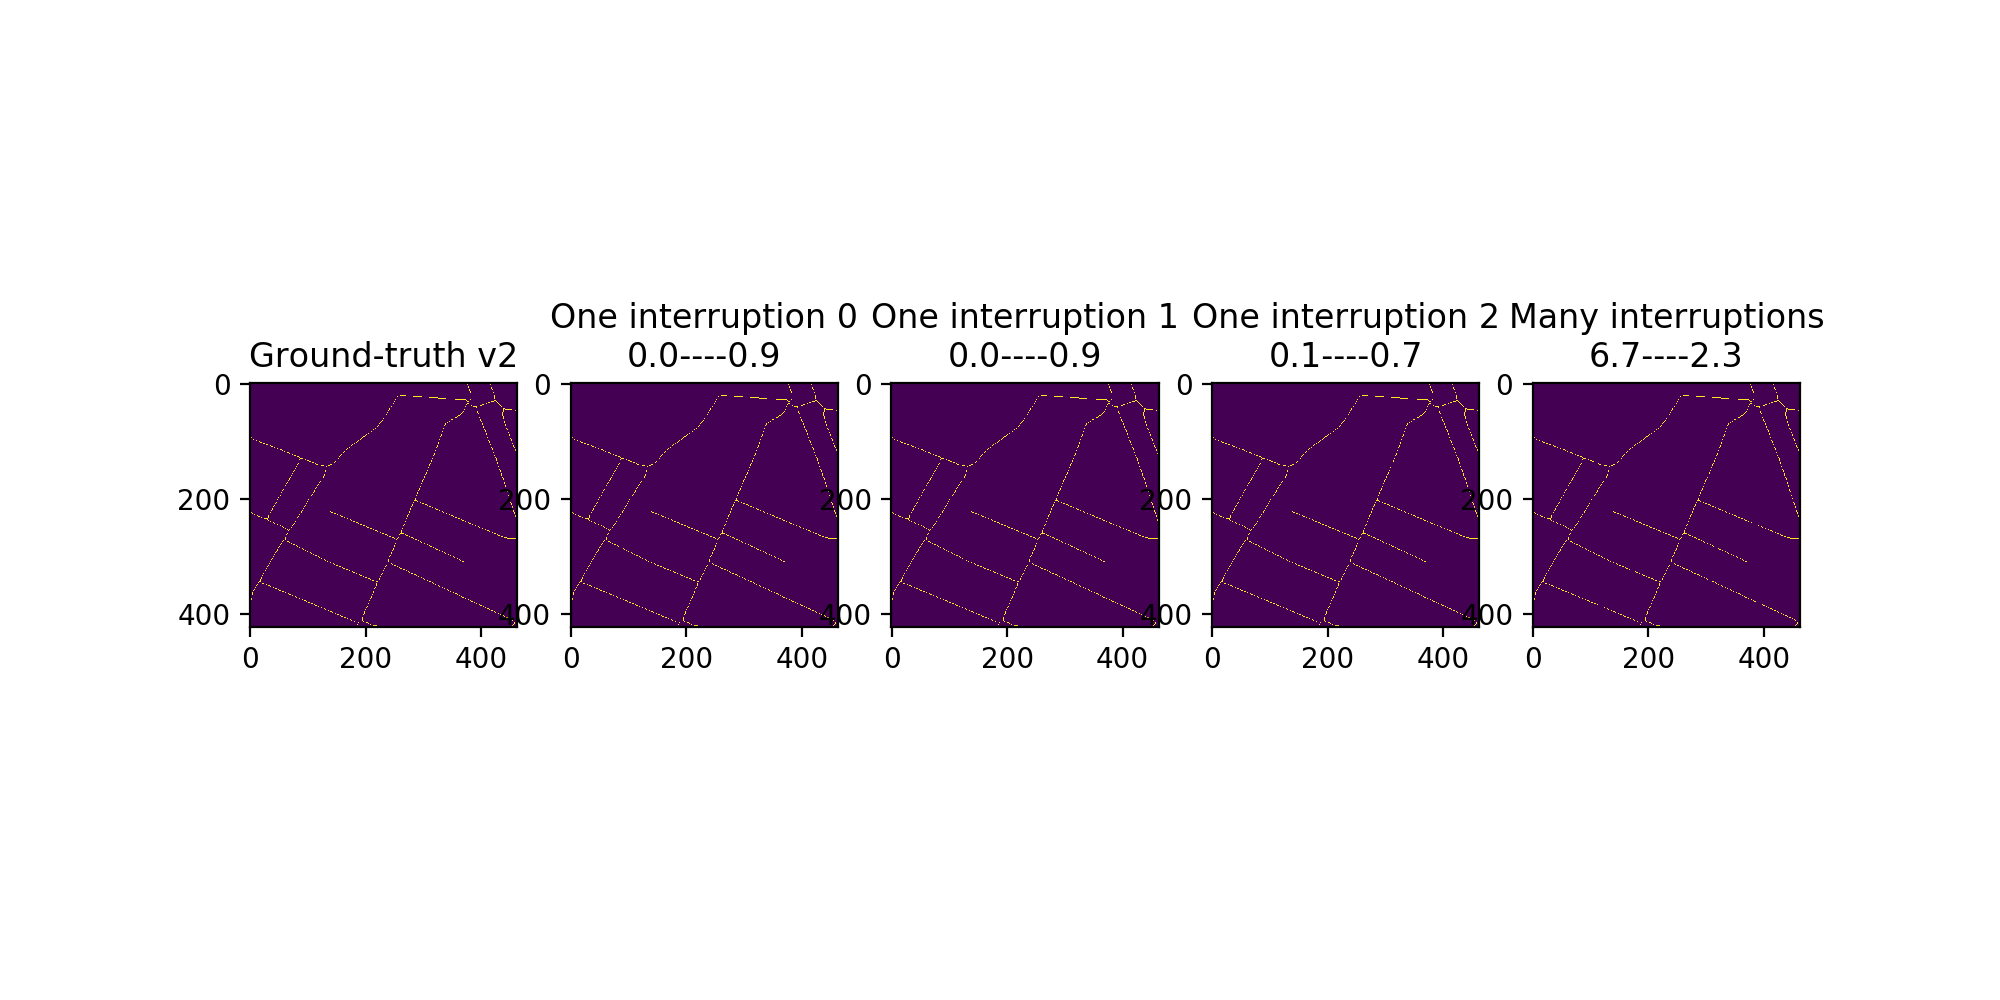

In [29]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v2")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v2)

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.1f}----{:0.1f}".format(score[0],score[1]))

<IPython.core.display.Javascript object>


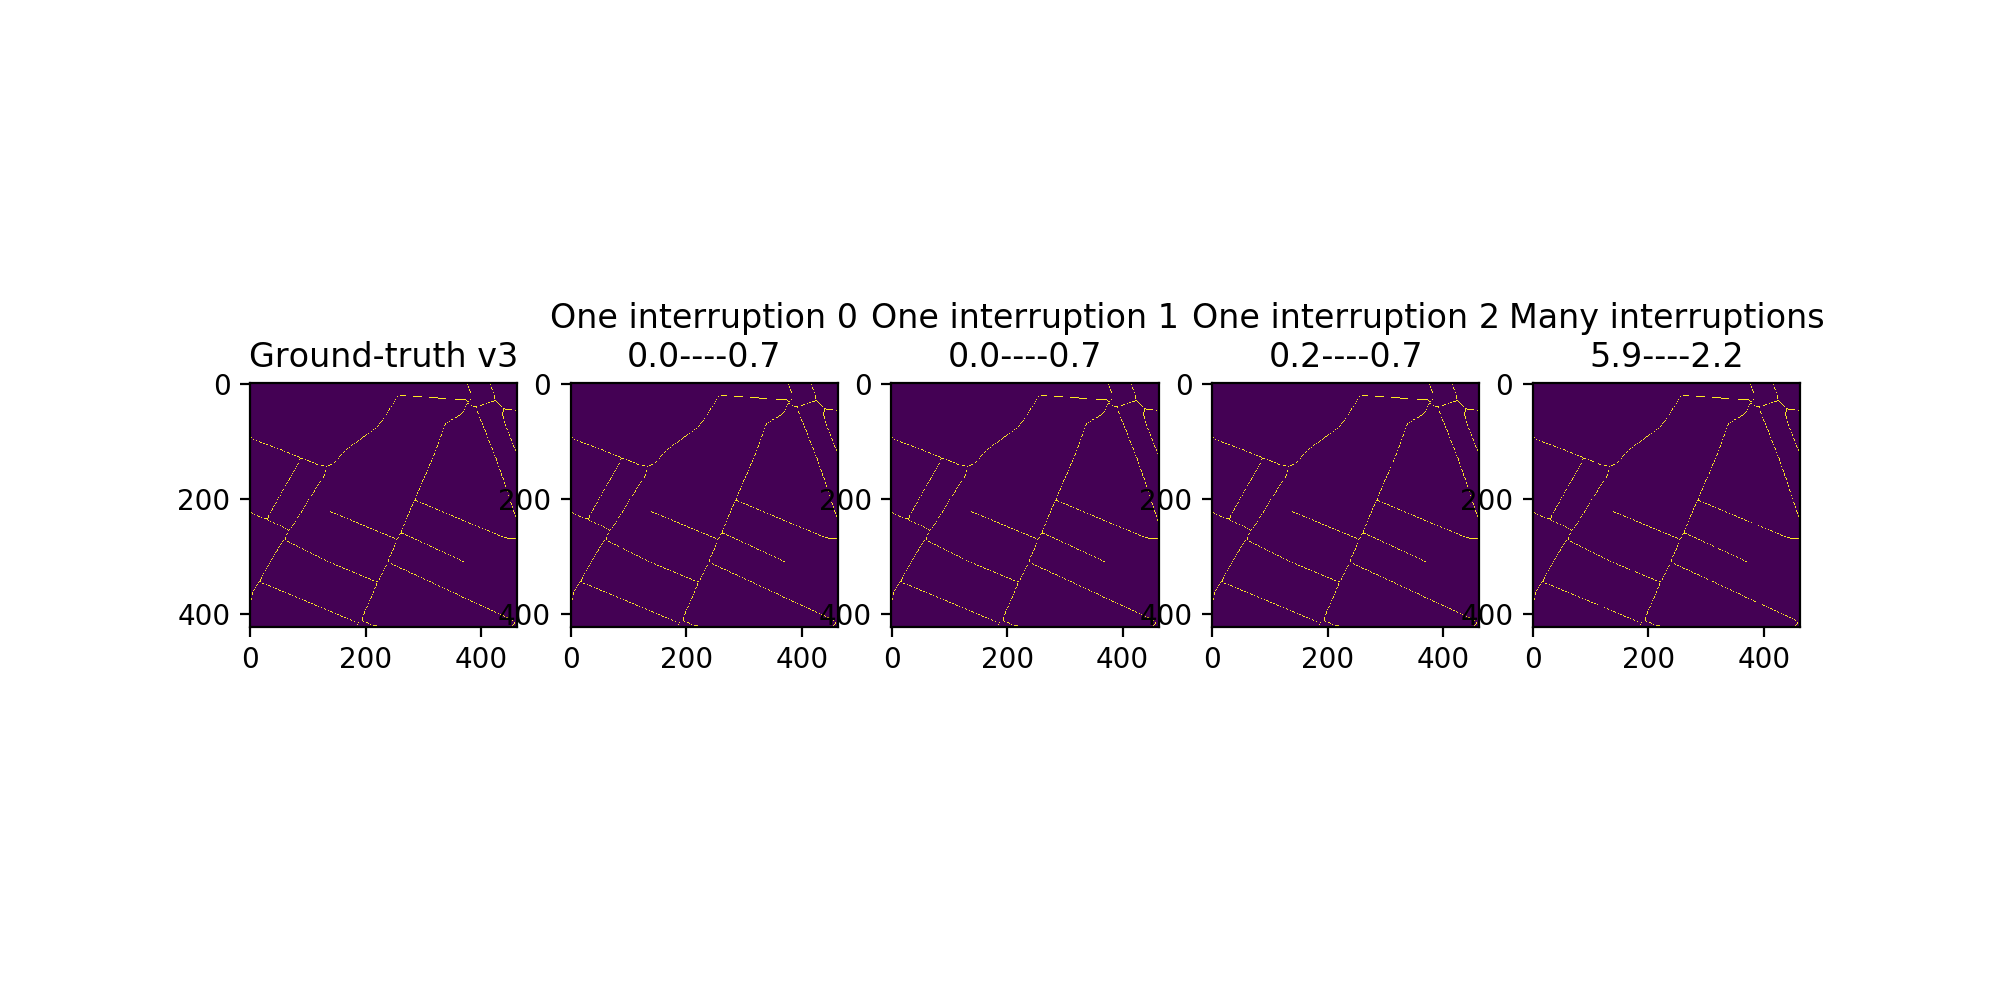

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v3")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v3)

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.1f}----{:0.1f}".format(score[0],score[1]))

<IPython.core.display.Javascript object>


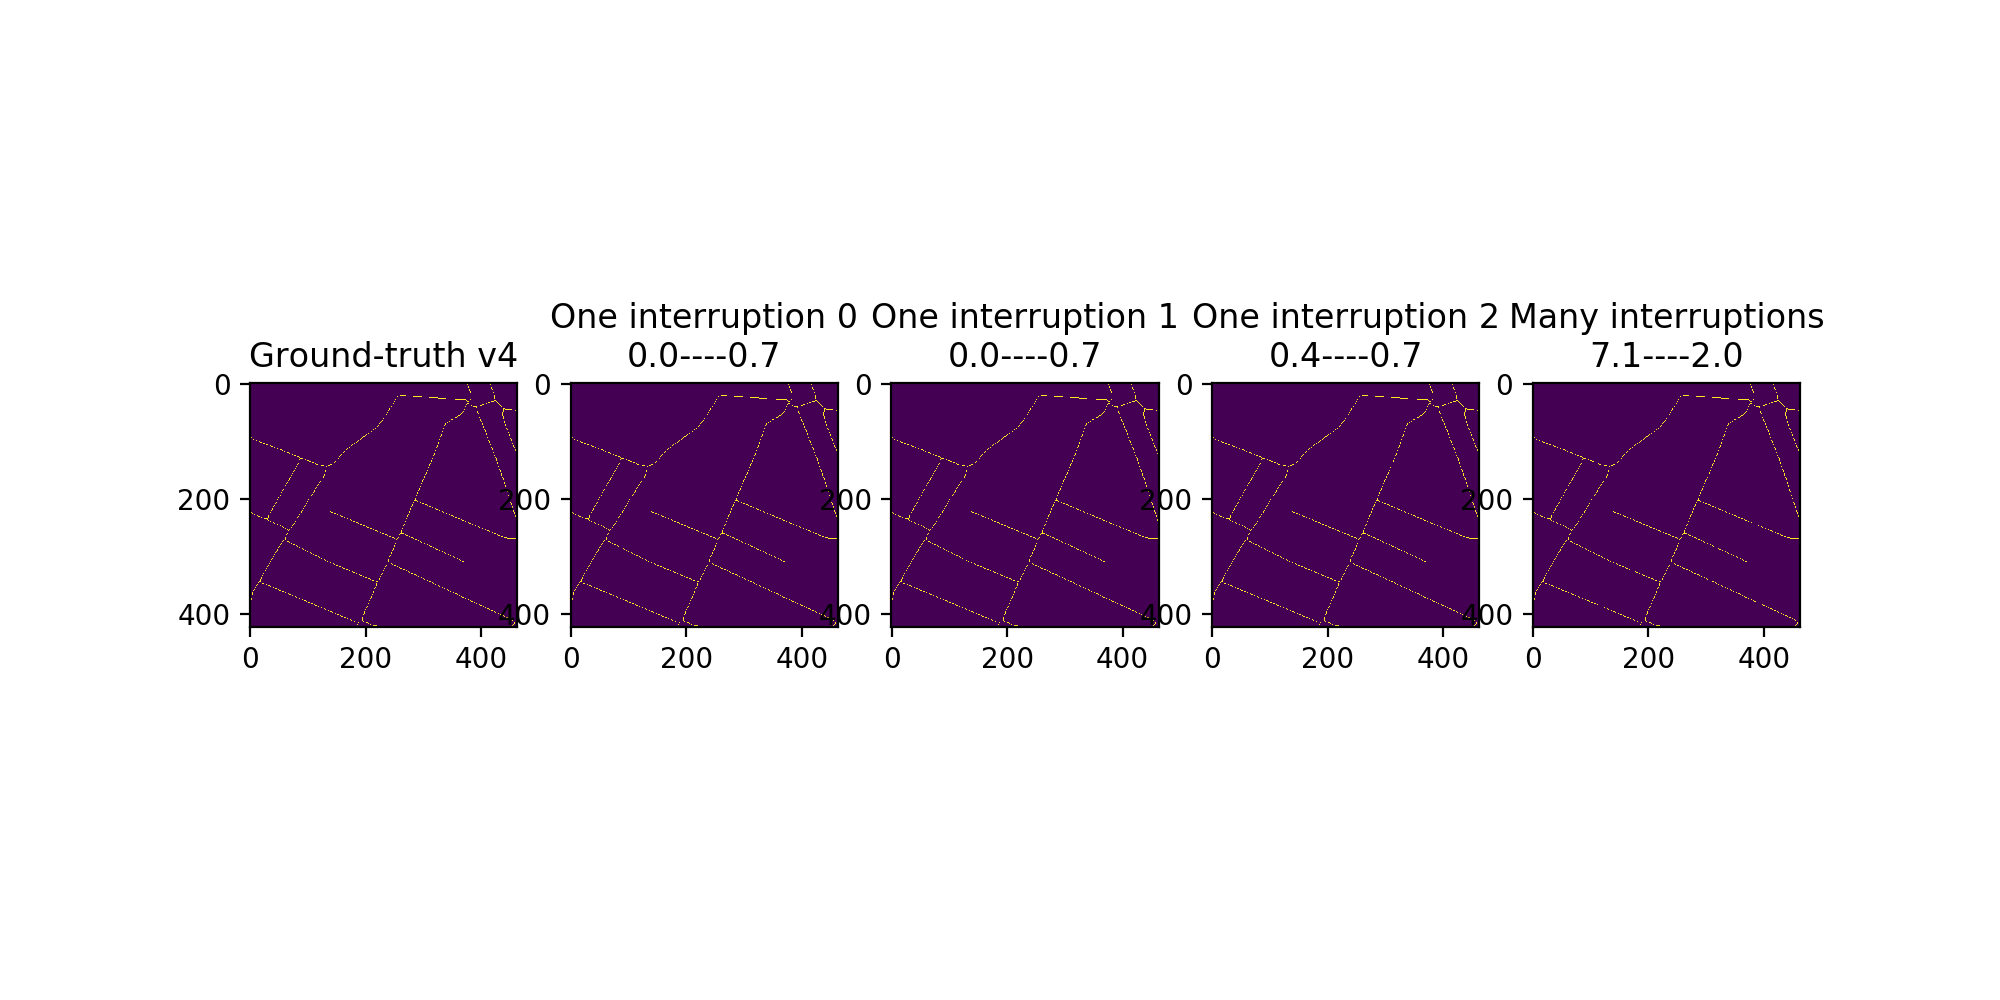

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(1,1+len(pred_masks),1)
plt.imshow(label_s)
plt.title("Ground-truth v4")

for i,(pred_mask,name) in enumerate(zip(pred_masks, names)):
        
    pred_mask_s = skeletonize(pred_mask*1)*1

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v4)

    plt.subplot(1,1+len(pred_masks),i+2)
    plt.imshow(pred_mask_s)
    plt.title(name + "\n{:0.1f}----{:0.1f}".format(score[0],score[1]))

# Score is NOT translation invariant
## This time, the score increases with the translation, and it also depends on the direction of the translation. 

<IPython.core.display.Javascript object>


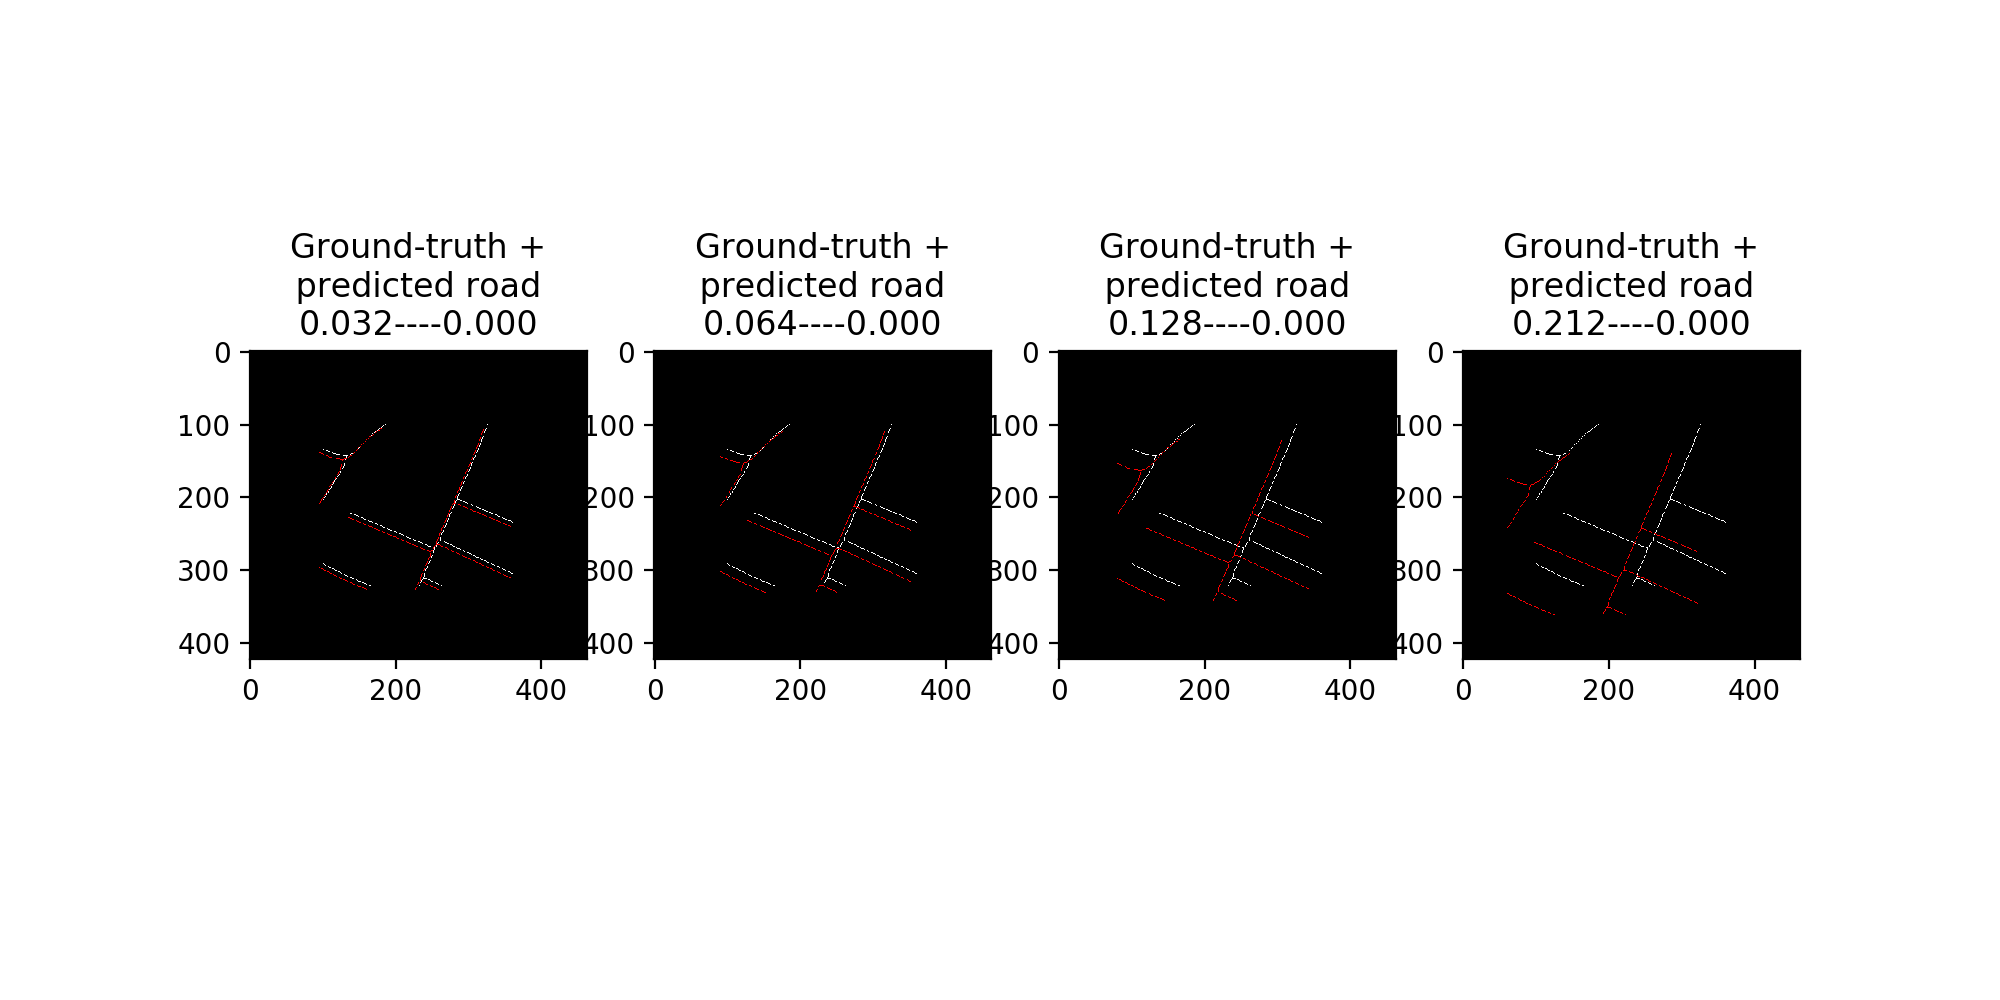

In [38]:
label = imageio.imread('manual_mods/gt.png')[:,:,0]>128
label[:100] = 0
label[-100:] = 0
label[:,:100] = 0
label[:,-100:] = 0

shifts = [5, 10, 20, 40]

plt.figure(figsize=(10,5))
for i,shift in enumerate(shifts):
    pred_mask = label.copy()
    pred_mask[shift:] = pred_mask[:-shift]
    pred_mask[:,:-shift] = pred_mask[:,shift:]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v1)

    plt.subplot(1,len(shifts),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

<IPython.core.display.Javascript object>


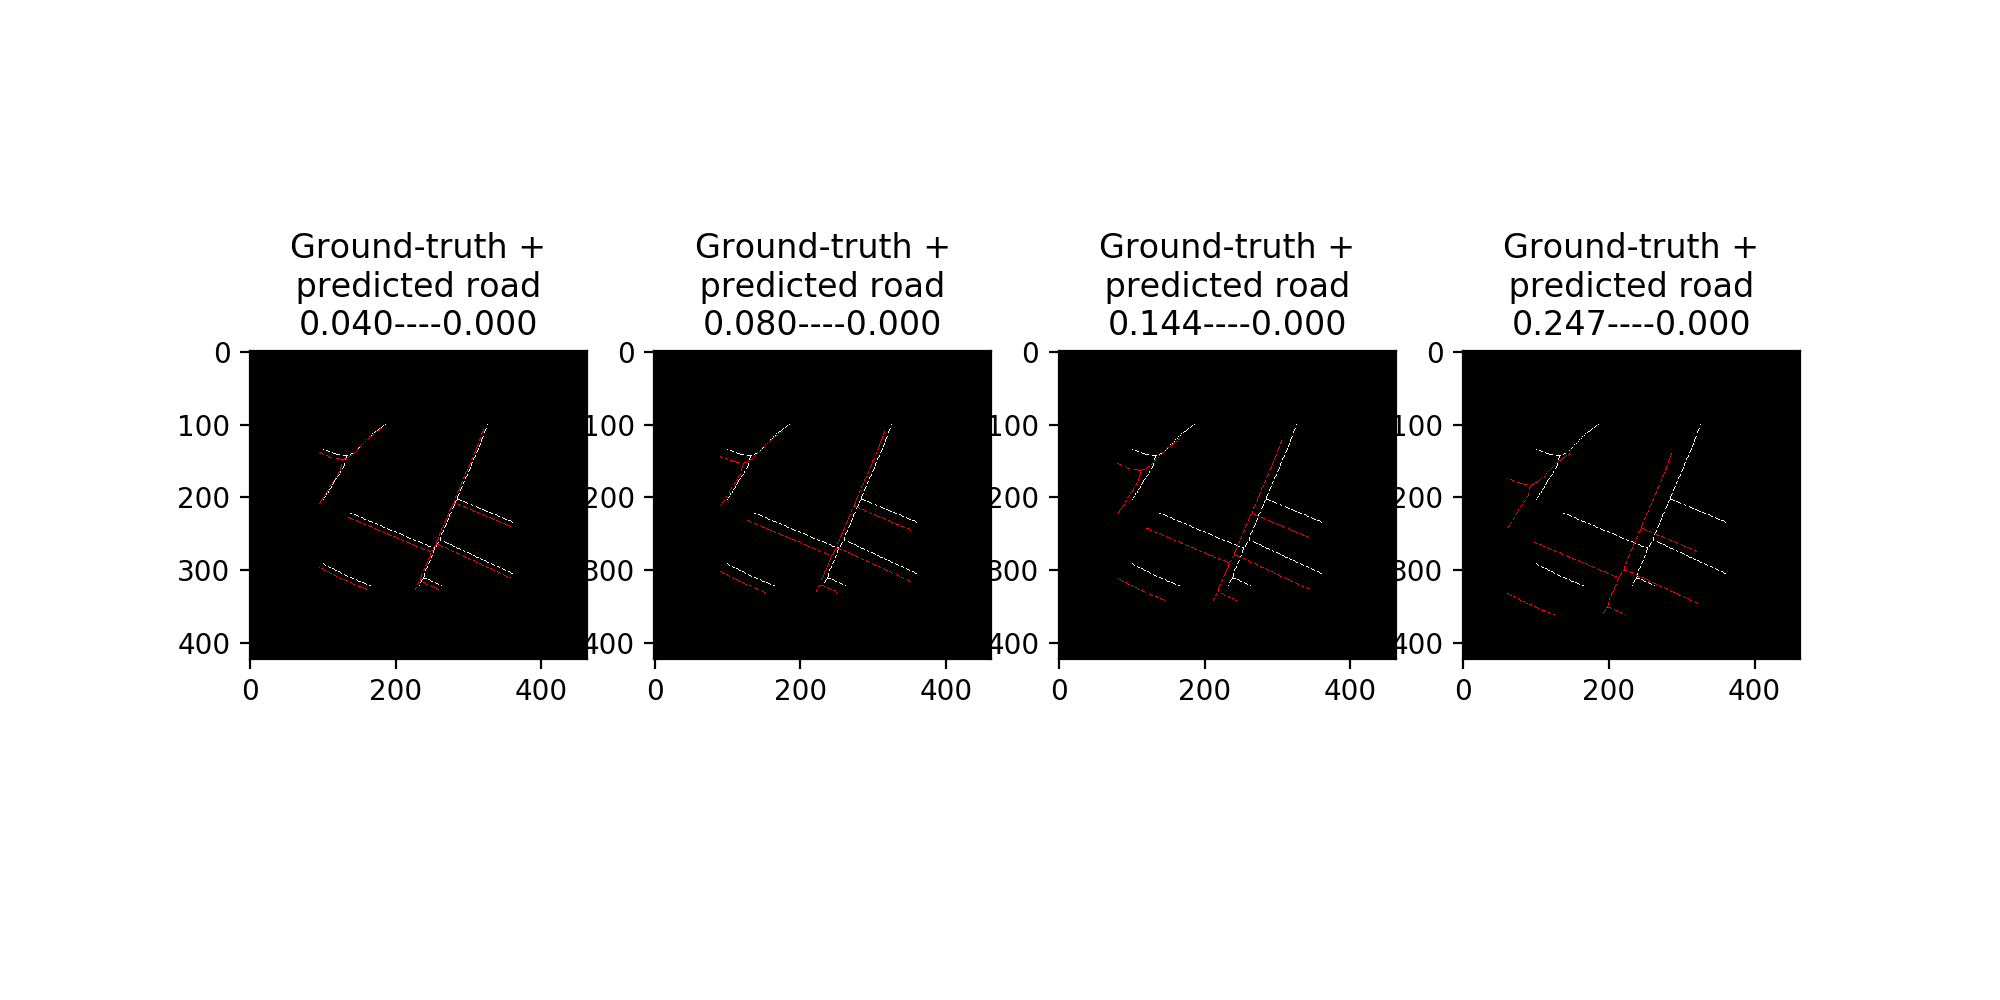

In [41]:
plt.figure(figsize=(10,5))
for i,shift in enumerate(shifts):
    pred_mask = label.copy()
    pred_mask[shift:] = pred_mask[:-shift]
    pred_mask[:,:-shift] = pred_mask[:,shift:]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v2)

    plt.subplot(1,len(shifts),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

<IPython.core.display.Javascript object>


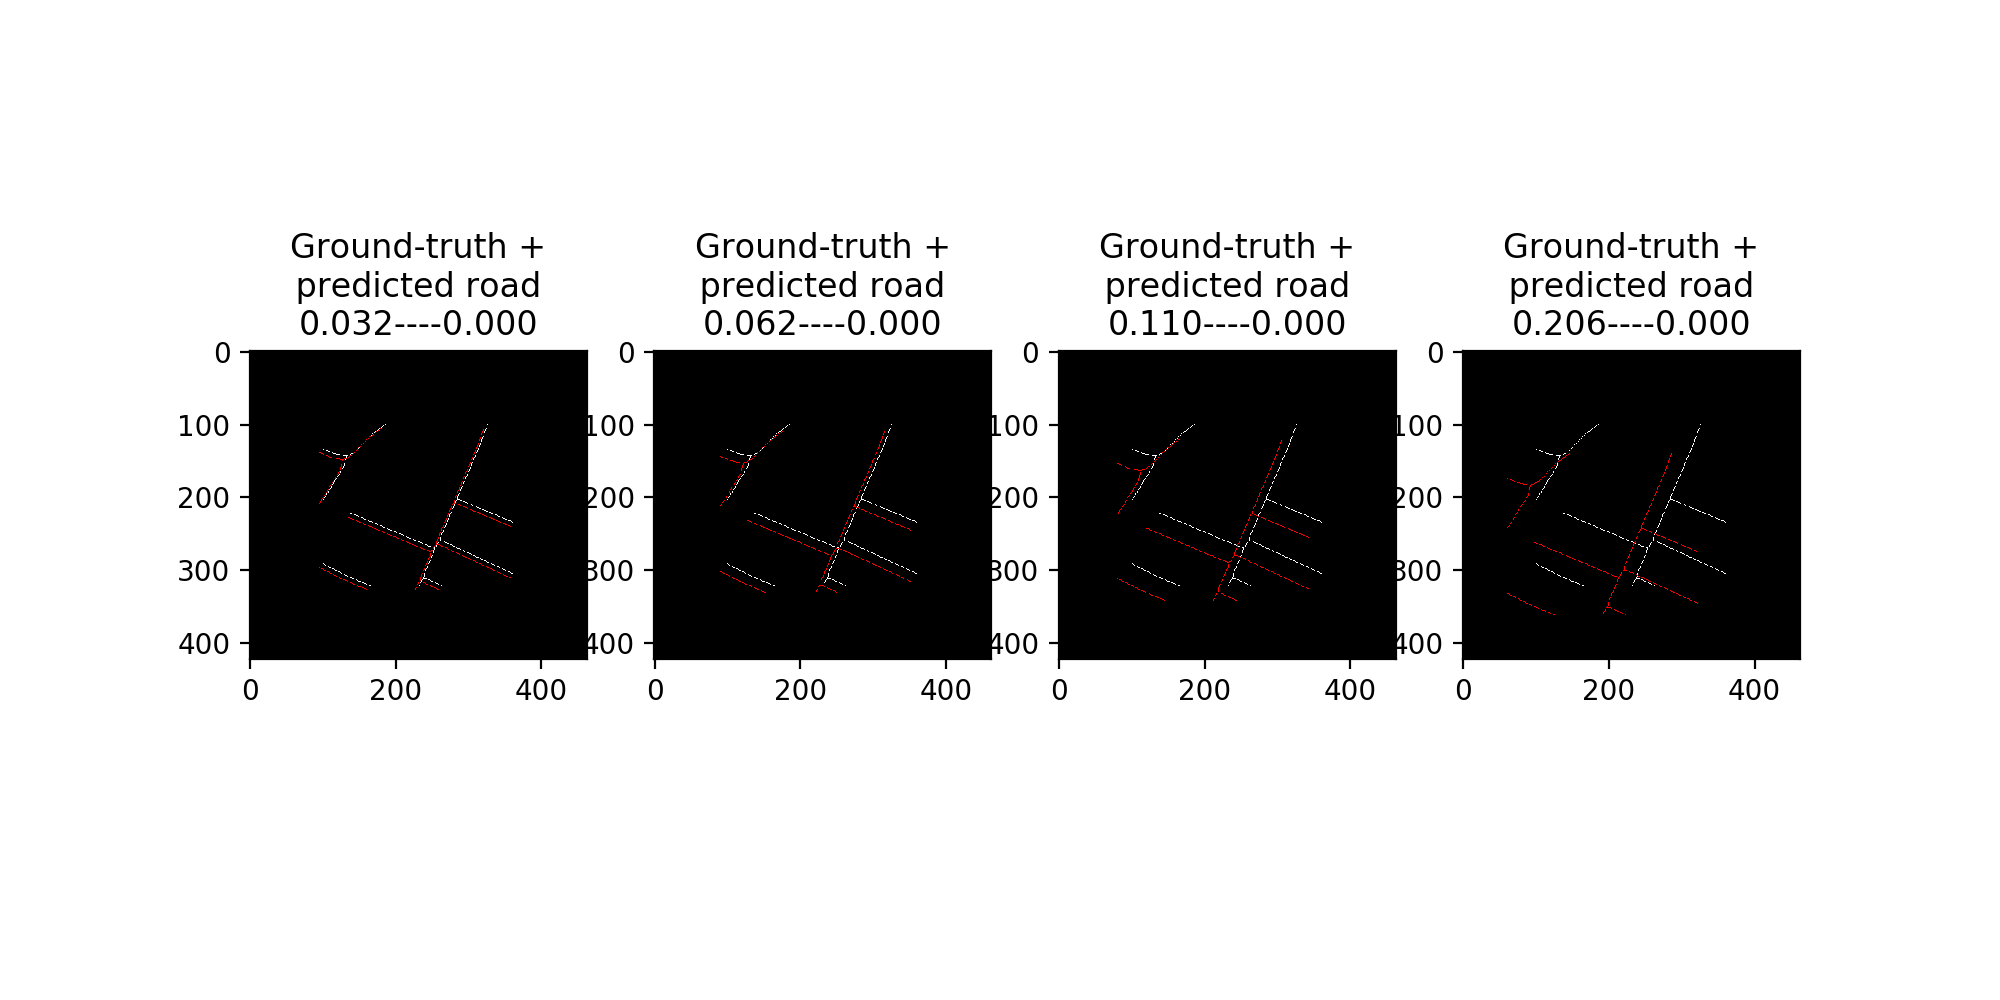

In [43]:
plt.figure(figsize=(10,5))
for i,shift in enumerate(shifts):
    pred_mask = label.copy()
    pred_mask[shift:] = pred_mask[:-shift]
    pred_mask[:,:-shift] = pred_mask[:,shift:]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v3)

    plt.subplot(1,len(shifts),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

<IPython.core.display.Javascript object>


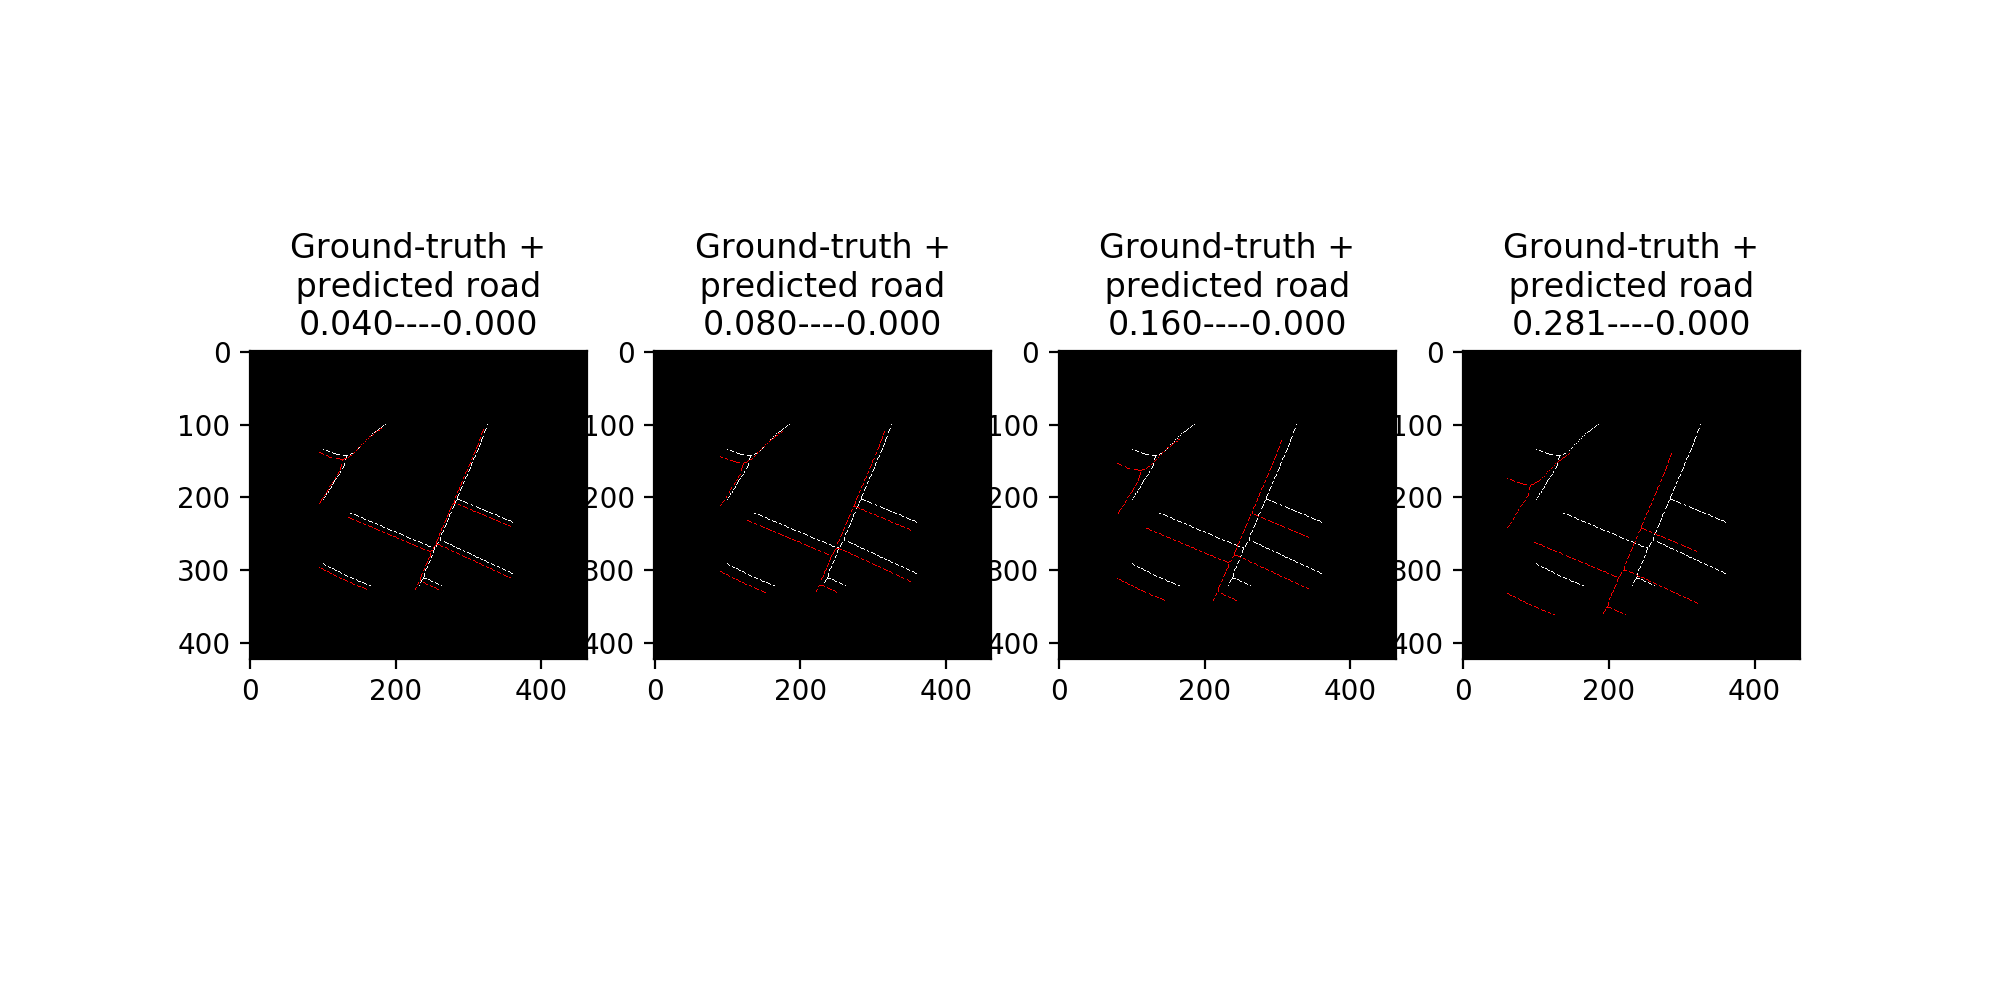

In [42]:
plt.figure(figsize=(10,5))
for i,shift in enumerate(shifts):
    pred_mask = label.copy()
    pred_mask[shift:] = pred_mask[:-shift]
    pred_mask[:,:-shift] = pred_mask[:,shift:]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v4)

    plt.subplot(1,len(shifts),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

# Rotation invariance
### This score increases with the rotation, as it now detects it.

<IPython.core.display.Javascript object>


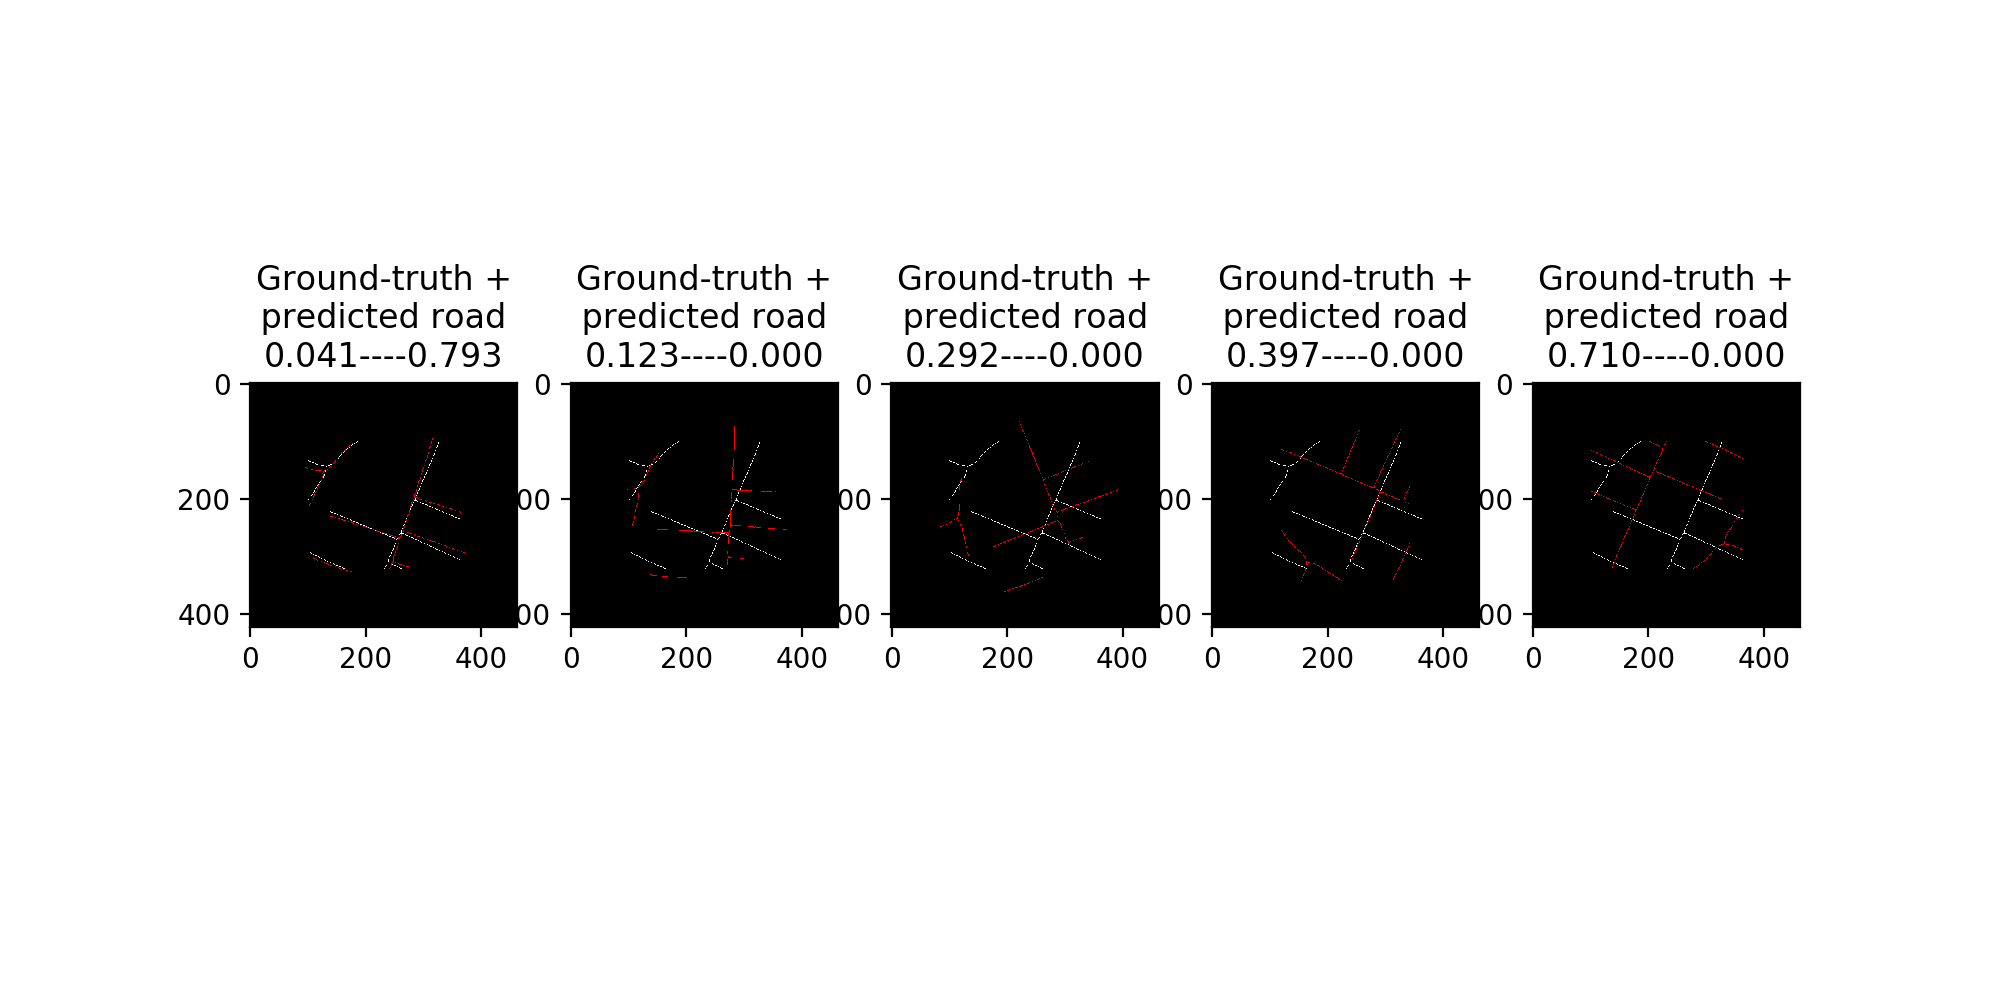

In [53]:
from skimage.transform import rotate

label = imageio.imread('manual_mods/gt.png')[:,:,0]>128
label[:100] = 0
label[-100:] = 0
label[:,:100] = 0
label[:,-100:] = 0

angles = [5, 20, 45, 90, 180]

plt.figure(figsize=(10,5))
for i,angle in enumerate(angles):
    pred_mask = label.copy()
    pred_mask = (rotate(pred_mask, angle)>0)

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v1)

    plt.subplot(1,len(angles),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

<IPython.core.display.Javascript object>


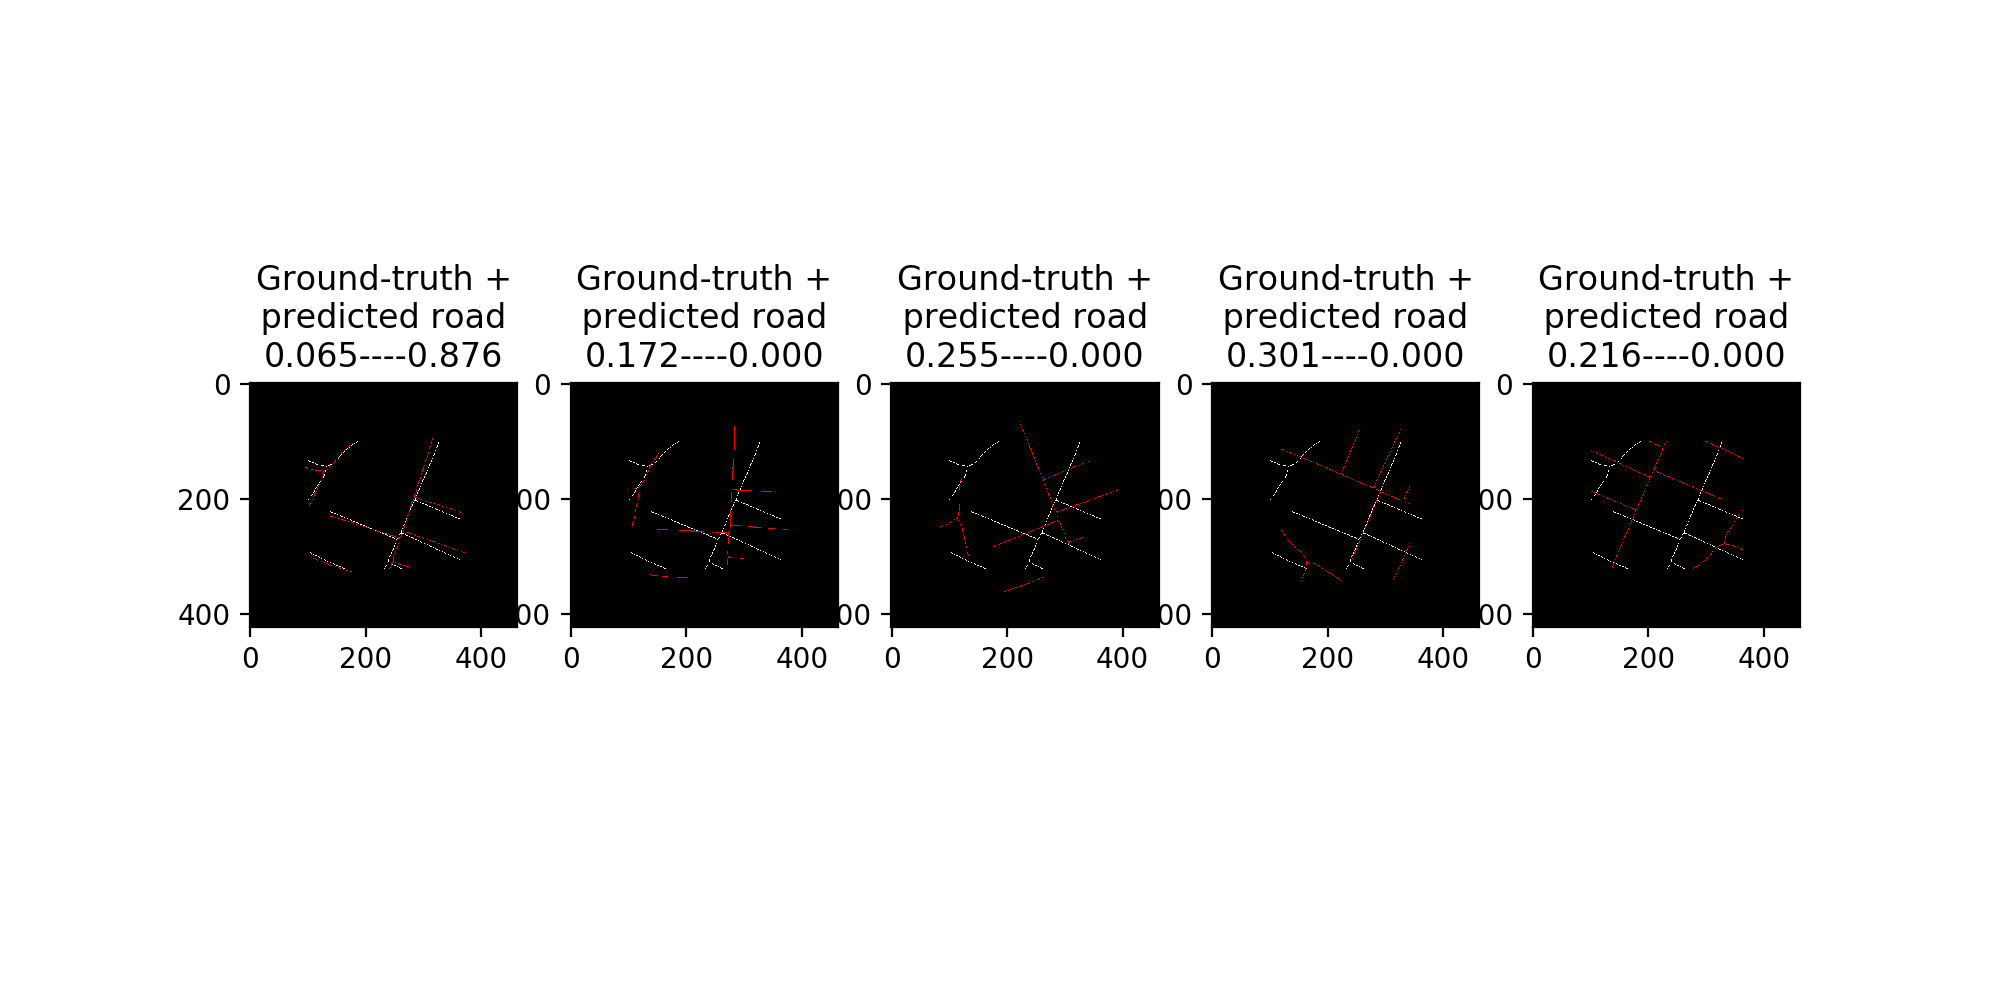

In [52]:
plt.figure(figsize=(10,5))
for i,angle in enumerate(angles):
    pred_mask = label.copy()
    pred_mask = (rotate(pred_mask, angle)>0)

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v2)

    plt.subplot(1,len(angles),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

<IPython.core.display.Javascript object>


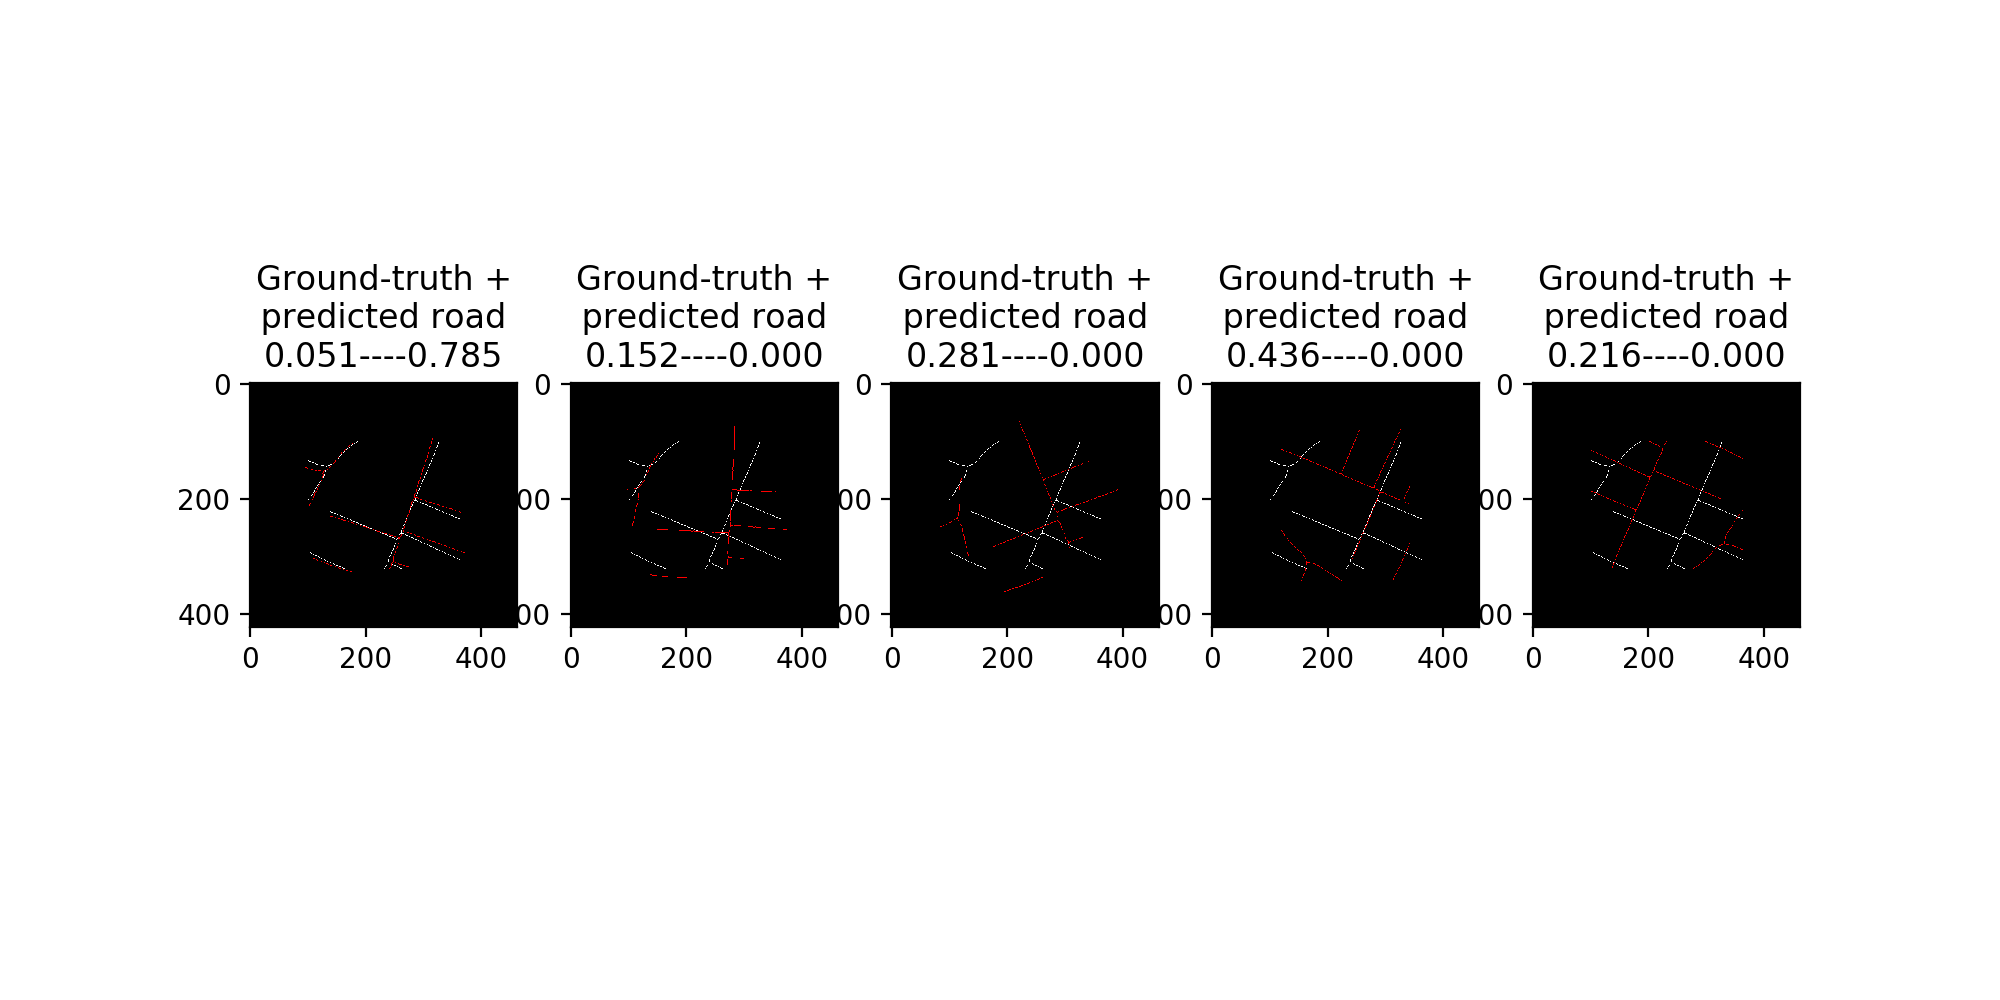

In [51]:
plt.figure(figsize=(10,5))
for i,angle in enumerate(angles):
    pred_mask = label.copy()
    pred_mask = (rotate(pred_mask, angle)>0)

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v3)

    plt.subplot(1,len(angles),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

<IPython.core.display.Javascript object>


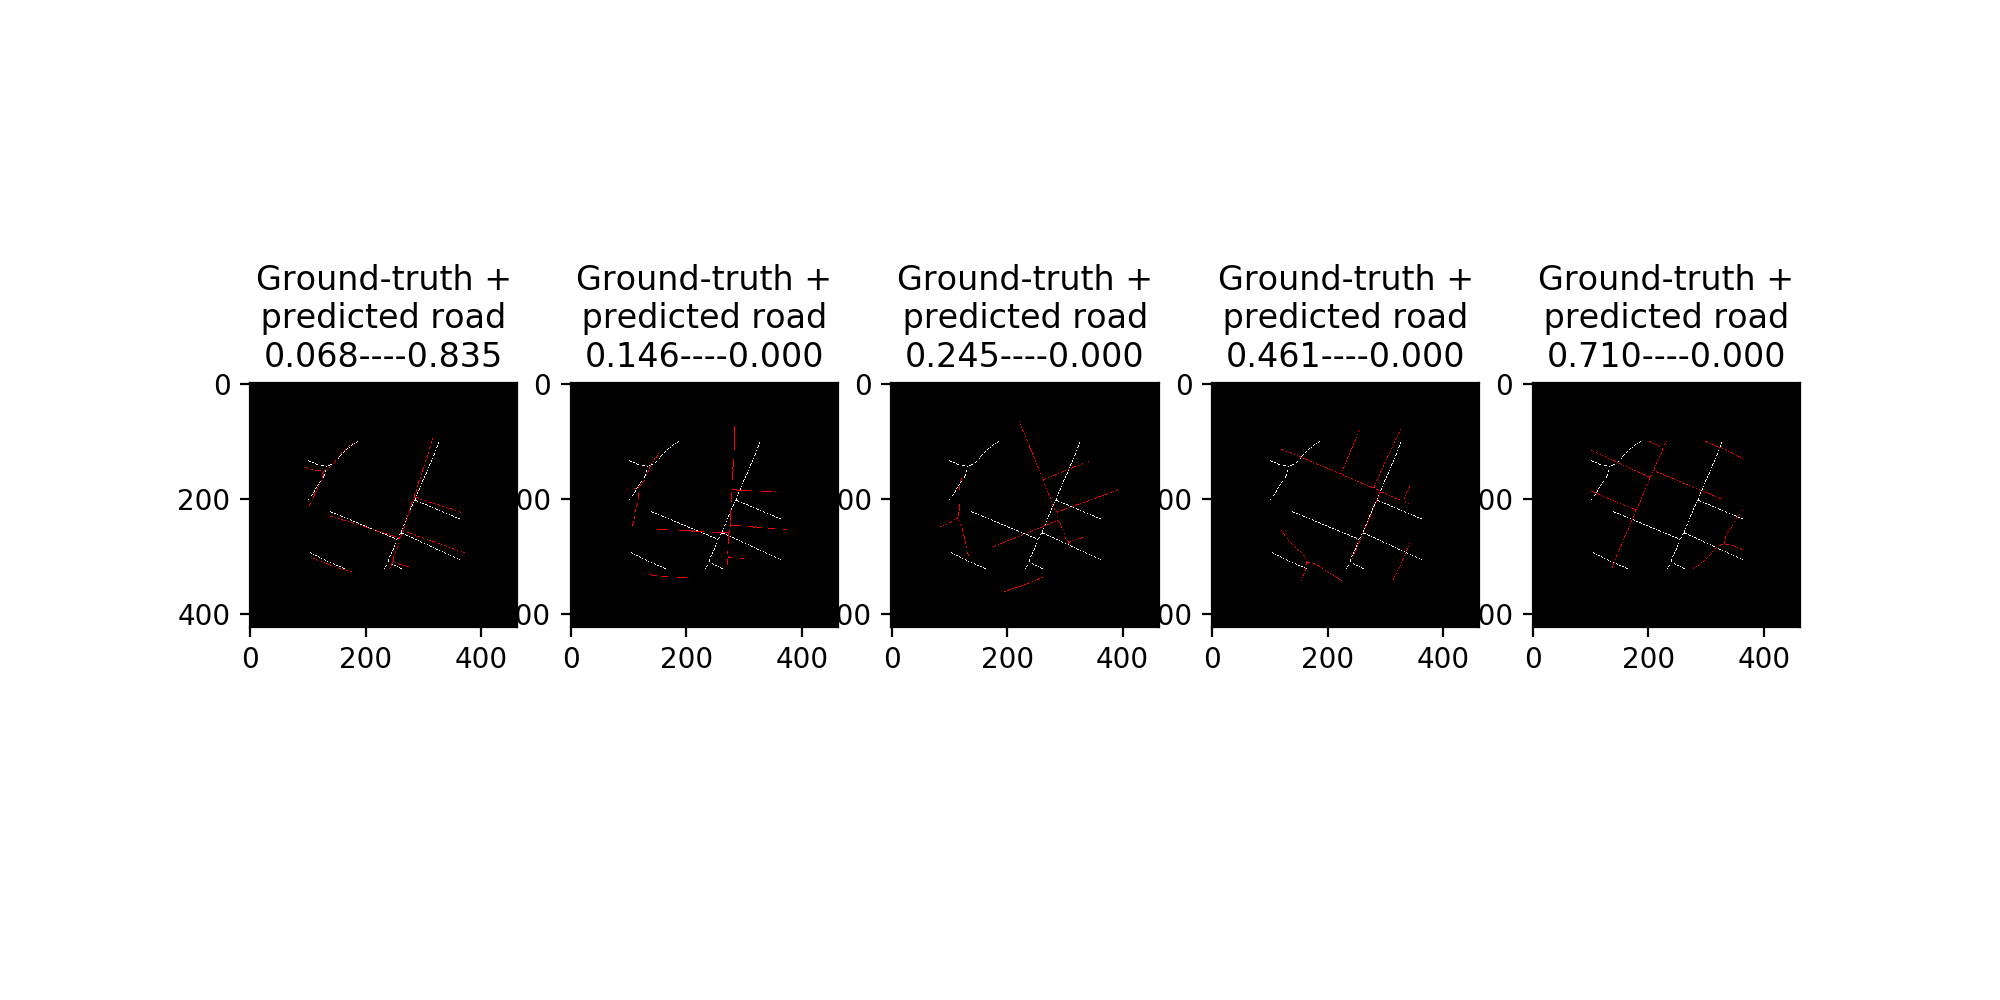

In [50]:
plt.figure(figsize=(10,5))
for i,angle in enumerate(angles):
    pred_mask = label.copy()
    pred_mask = (rotate(pred_mask, angle)>0)

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1


    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s,v4)

    plt.subplot(1,len(angles),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

# Rescaling the prediction
#### The score changes according to the scale

<IPython.core.display.Javascript object>


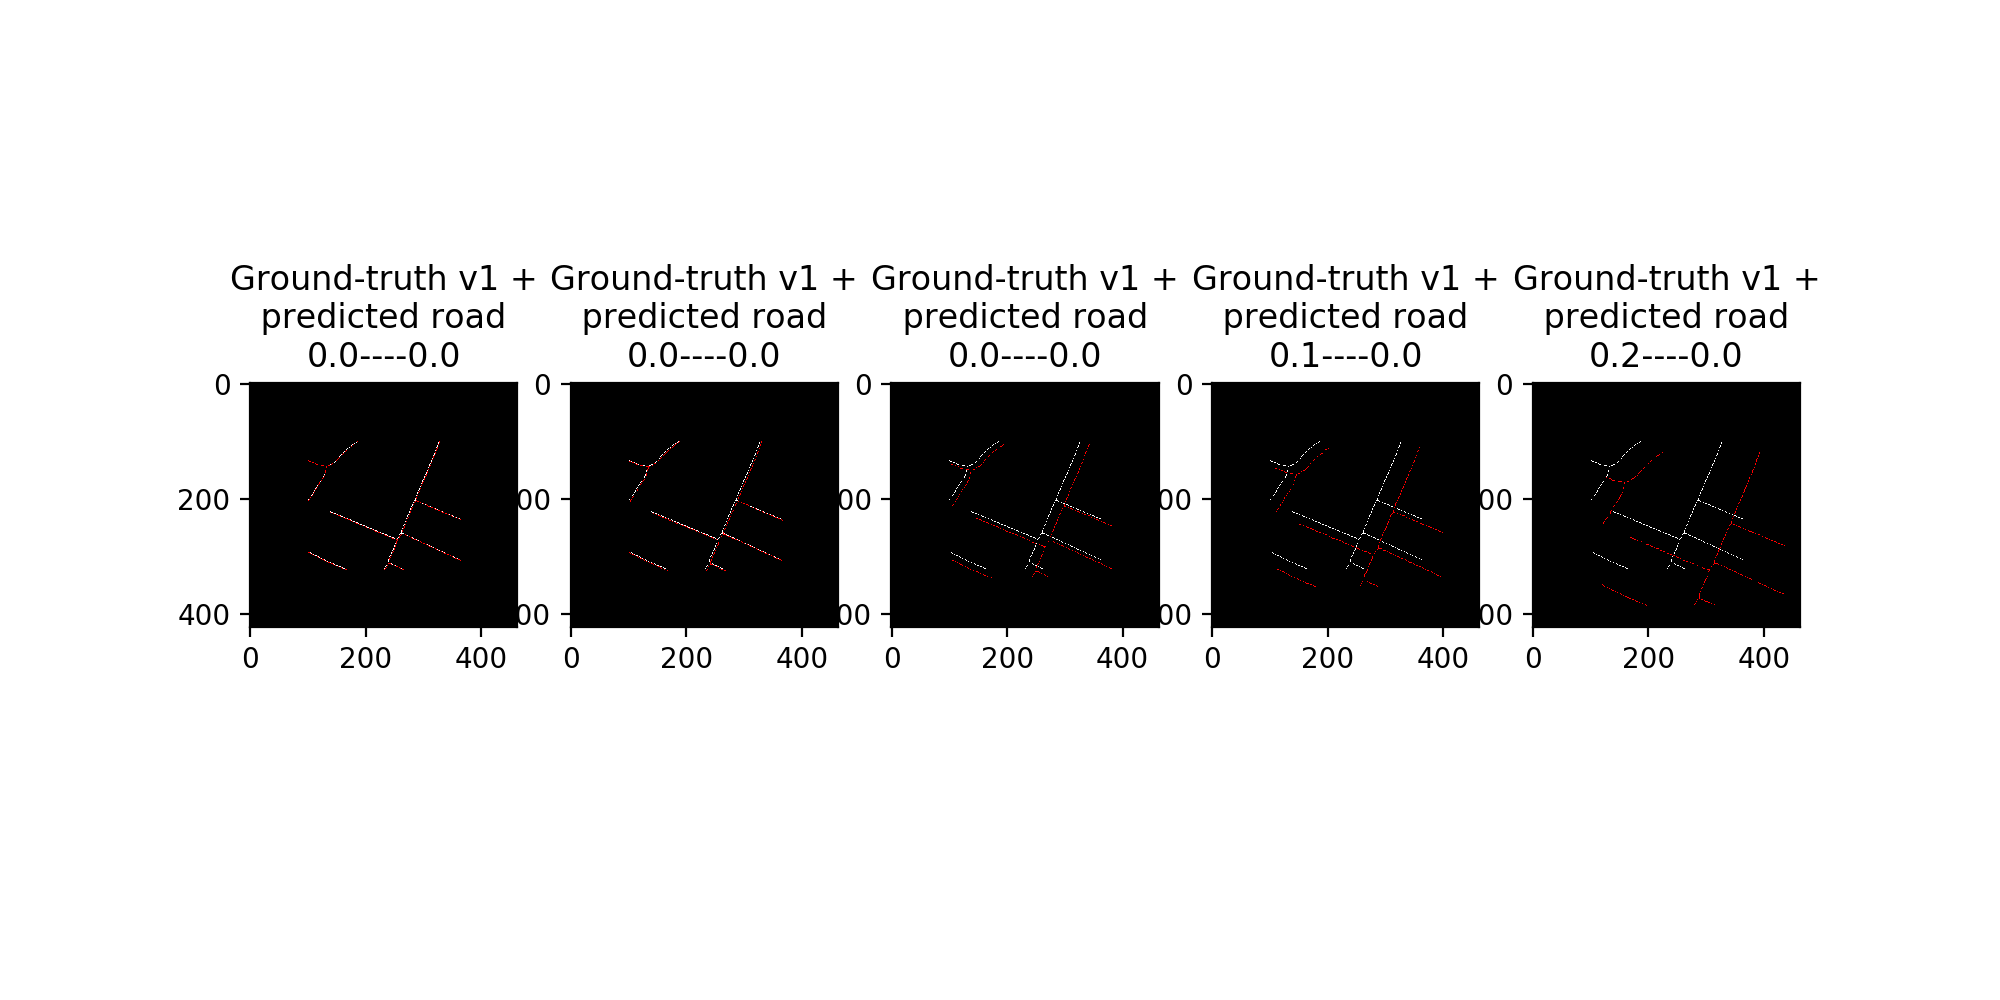

In [58]:
from skimage.transform import rescale

label = imageio.imread('manual_mods/gt.png')[:,:,0]>128
label[:100] = 0
label[-100:] = 0
label[:,:100] = 0
label[:,-100:] = 0

scales = [1.005, 1.01, 1.05, 1.1, 1.2]

plt.figure(figsize=(10,5))
for i,scale in enumerate(scales):
    pred_mask = label.copy()
    pred_mask = (rescale(pred_mask, scale, multichannel=False, 
                         anti_aliasing=True, mode='constant')>0)
    pred_mask = pred_mask[:label.shape[0], :label.shape[1]]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1

    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v1)

    plt.subplot(1,len(scales),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth v1 +\n predicted road \n{:0.1f}----{:0.1f}".format(score[0], score[1]))

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


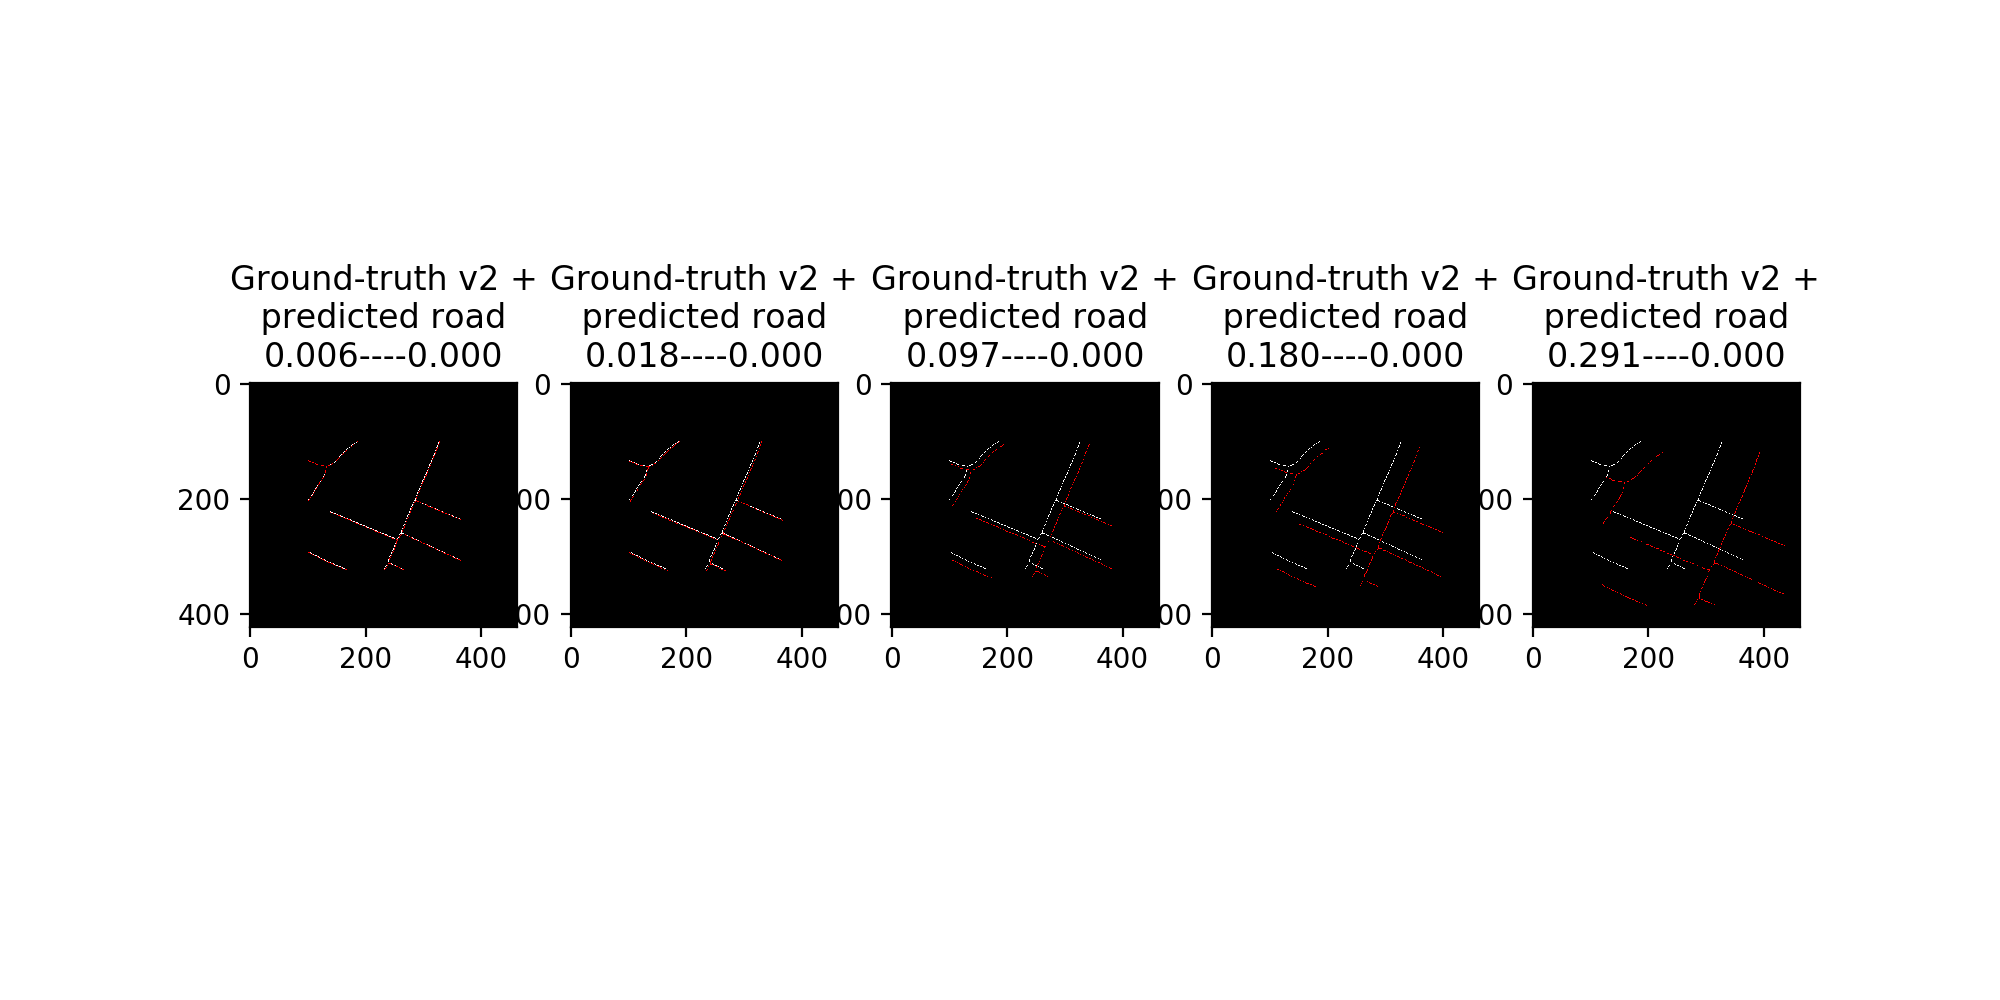

In [59]:

plt.figure(figsize=(10,5))
for i,scale in enumerate(scales):
    pred_mask = label.copy()
    pred_mask = (rescale(pred_mask, scale, multichannel=False, 
                         anti_aliasing=True, mode='constant')>0)
    pred_mask = pred_mask[:label.shape[0], :label.shape[1]]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1

    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v2)

    plt.subplot(1,len(scales),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth v2 +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


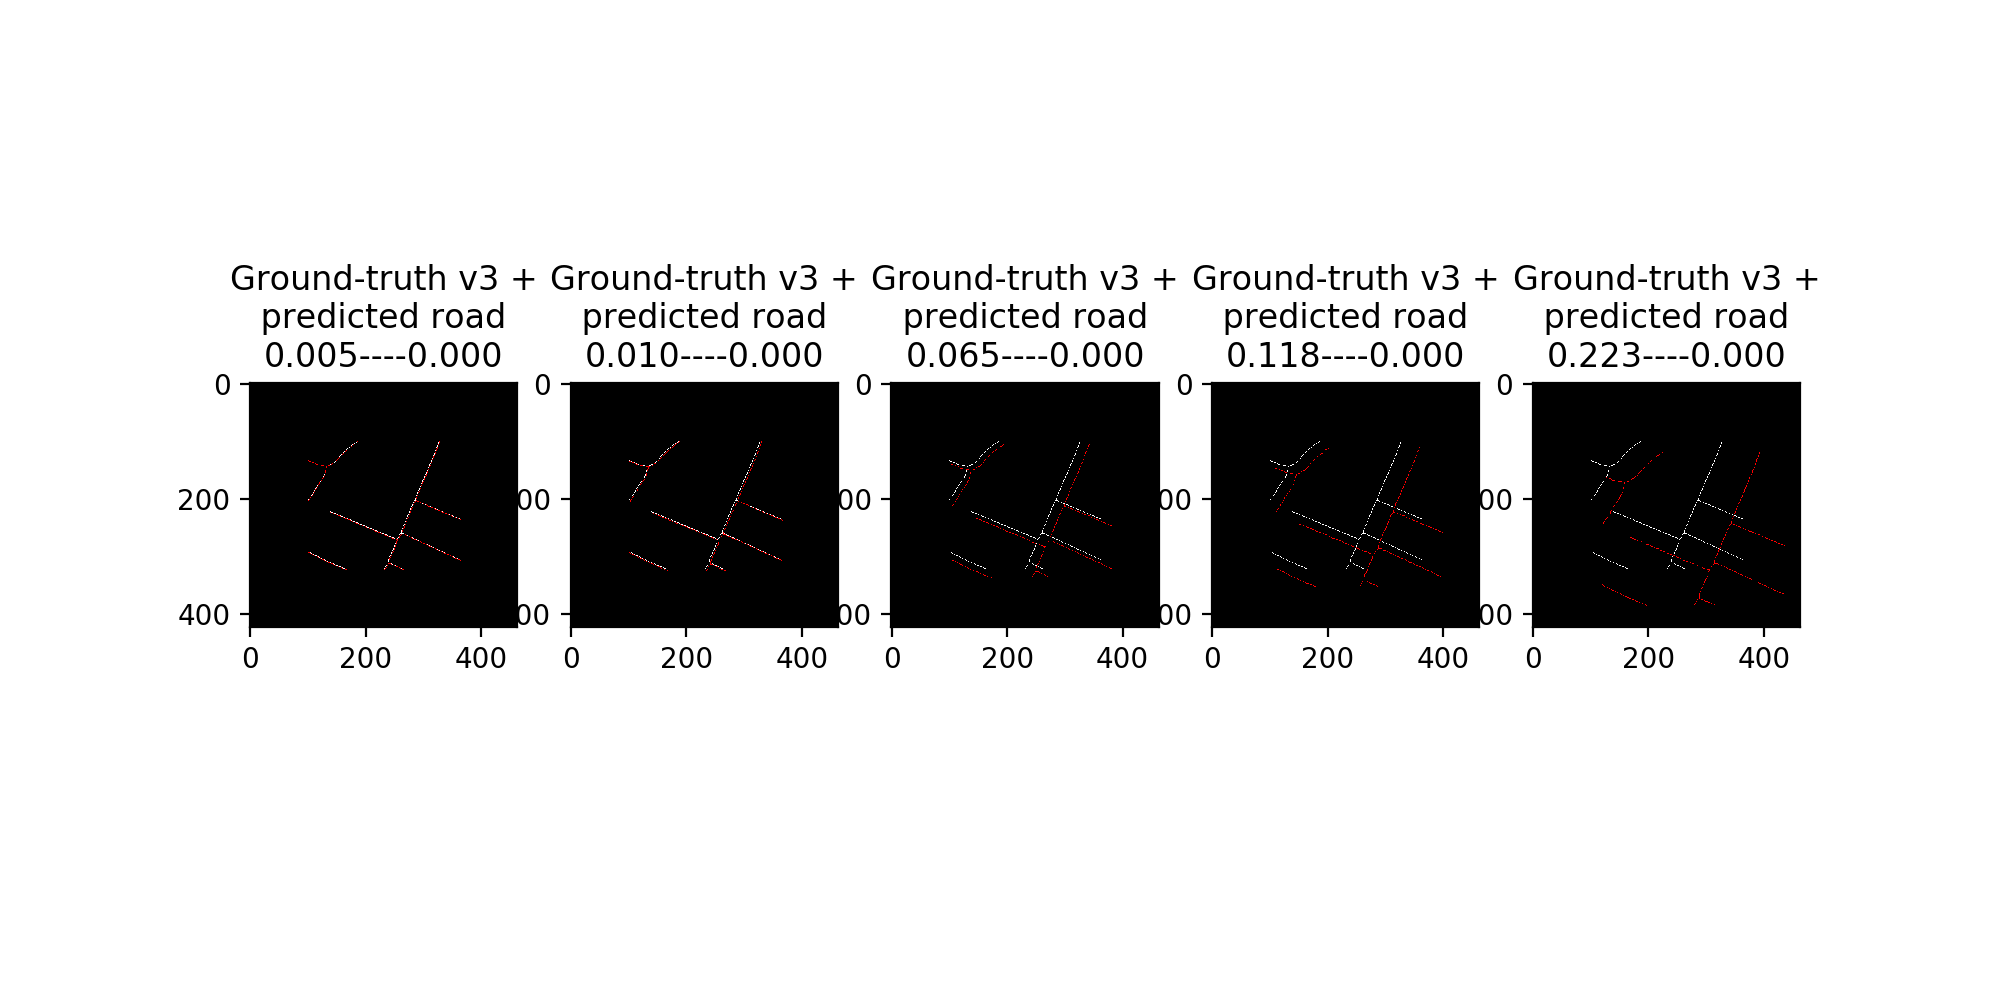

In [60]:
plt.figure(figsize=(10,5))
for i,scale in enumerate(scales):
    pred_mask = label.copy()
    pred_mask = (rescale(pred_mask, scale, multichannel=False, 
                         anti_aliasing=True, mode='constant')>0)
    pred_mask = pred_mask[:label.shape[0], :label.shape[1]]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1

    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v3)

    plt.subplot(1,len(scales),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth v3 +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


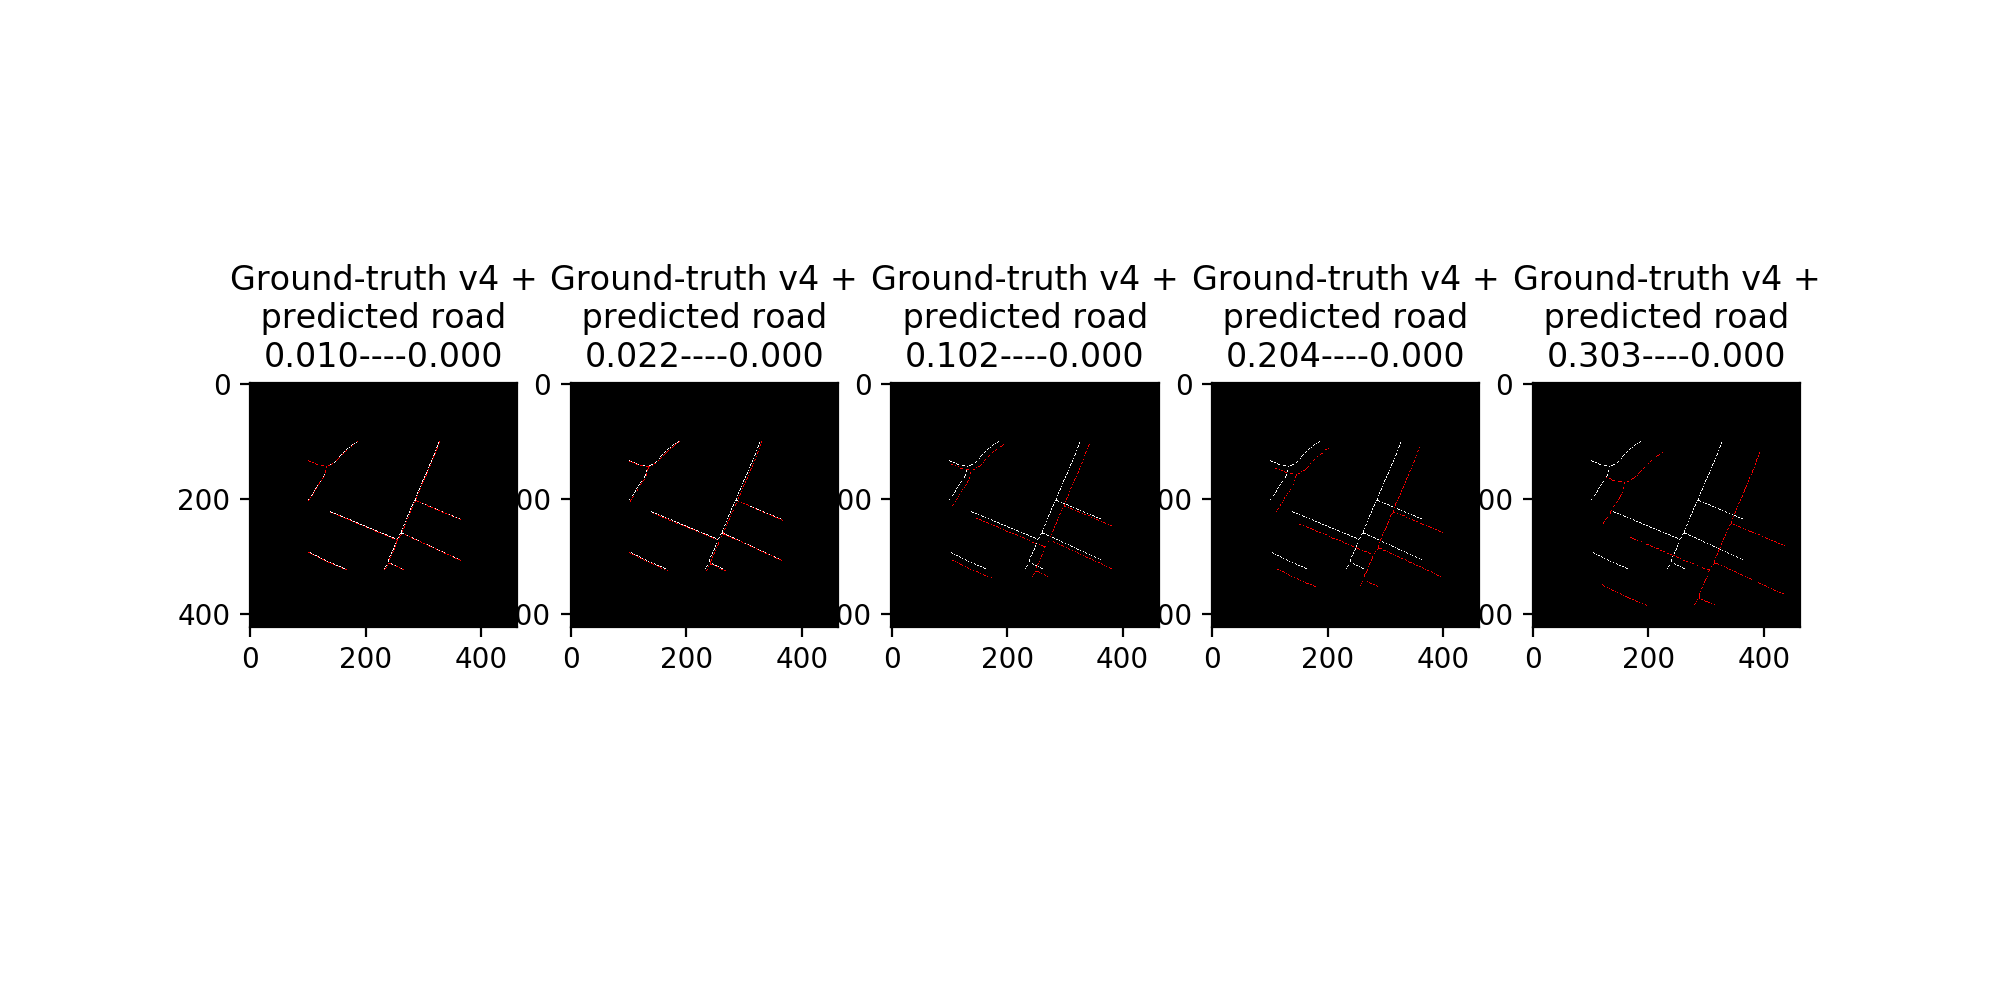

In [61]:
plt.figure(figsize=(10,5))
for i,scale in enumerate(scales):
    pred_mask = label.copy()
    pred_mask = (rescale(pred_mask, scale, multichannel=False, 
                         anti_aliasing=True, mode='constant')>0)
    pred_mask = pred_mask[:label.shape[0], :label.shape[1]]

    label_s = skeletonize(label*1)*1
    pred_mask_s = skeletonize(pred_mask*1)*1

    _comb = np.stack([label_s.copy()]*3, 2)
    _comb[pred_mask_s>0] = np.array([1,0,0])

    score = pipe.score_wasserstein_height_2D(pred_mask_s, label_s, v4)

    plt.subplot(1,len(scales),i+1)
    plt.imshow(_comb*255)
    plt.title("Ground-truth v4 +\n predicted road \n{:0.3f}----{:0.3f}".format(score[0], score[1]))